In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [322]:
html_page = pd.read_table('http://tennisabstract.com/charting/20050117-M-Australian_Open-R128-Novak_Djokovic-Marat_Safin.html')

## all active mens pages

In [4]:
match_id_list = soup.select('a[href*=2]')[2:4005]

## all mens pages

In [25]:
match_id_list_all = soup.select('a[href*=2]')[2:4925]

In [34]:
match_href_list = []
for x in match_id_list:
    match_href_list.append(x['href'])

In [35]:
match_href_list_all = []
for x in match_id_list_all:
    match_href_list_all.append(x['href'])

In [240]:
match_href_list = set(match_href_list)
len(match_href_list)

2195

In [241]:
match_href_list_all = set(match_href_list_all)
len(match_href_list_all)

2462

## all womens pages

In [362]:
htmlw = requests.get('http://tennisabstract.com/charting/meta.html')
soupw = BeautifulSoup(htmlw.content, 'html.parser')

In [389]:
womens_match_id = soupw.select('a[href*=2]')[4940:9484]

In [390]:
womens_match_href_list = []
for x in womens_match_id:
    womens_match_href_list.append(x['href'])

In [407]:
womens_match_href_list = list(set(womens_match_href_list))

### serve stats

In [343]:
html = html_page.iloc[12][0]

In [344]:
soup = BeautifulSoup(html, 'html.parser')

In [296]:
p1_ace_per =  float(soup.findAll('td', {'align':'right'})[0].text[:-1])/100
p1_ace_per

0.015

In [90]:
p1_df_per =  float(soup.findAll('td', {'align':'right'})[1].text[:-1])/100
p1_df_per

0.076

In [91]:
p1_1stIn_per =  float(soup.findAll('td', {'align':'right'})[2].text[:-1])/100
p1_1stIn_per

0.591

In [92]:
p1_1stW_per =  float(soup.findAll('td', {'align':'right'})[3].text[:-1])/100
p1_1stW_per

0.41

In [93]:
p1_2ndIn_per =  float(soup.findAll('td', {'align':'right'})[4].text[:-1])/100
p1_2ndIn_per

0.185

In [94]:
p2_ace_per =  float(soup.findAll('td', {'align':'right'})[9].text[:-1])/100
p2_ace_per

0.02

In [96]:
p2_df_per =  float(soup.findAll('td', {'align':'right'})[10].text[:-1])/100
p2_df_per

0.02

In [97]:
p2_1stIn_per =  float(soup.findAll('td', {'align':'right'})[11].text[:-1])/100
p2_1stIn_per

0.529

In [98]:
p2_1stW_per =  float(soup.findAll('td', {'align':'right'})[12].text[:-1])/100
p2_1stW_per

0.9259999999999999

In [99]:
p2_2ndIn_per =  float(soup.findAll('td', {'align':'right'})[13].text[:-1])/100
p2_2ndIn_per

0.542

### number of points won

In [335]:
html2 = html_page.iloc[5][0]

In [336]:
soup = BeautifulSoup(html2, 'html.parser')

In [132]:
p1_serve_ptswon = int(soup.findAll('td', {'align':'right'})[1].text.split(' ')[0])
p1_serve_ptswon

21

In [135]:
p1_swin_per = soup.findAll('td', {'align':'right'})[1].text.split(' ')[-1]
p1_swin_per2 = p1_swin_per[p1_swin_per.find("(")+1:p1_swin_per.find(")")]
p1_serve_win = float(p1_swin_per2.strip('%')) / 100.0
p1_serve_win

0.32

In [140]:
p2_serve_ptswon = int(soup.findAll('td', {'align':'right'})[38].text.split(' ')[0])
p2_serve_ptswon

38

In [141]:
p2_swin_per = soup.findAll('td', {'align':'right'})[38].text.split(' ')[-1]
p2_swin_per2 = p2_swin_per[p2_swin_per.find("(")+1:p2_swin_per.find(")")]
p2_serve_win = float(p2_swin_per2.strip('%')) / 100.0
p2_serve_win

0.75

### set scores

In [278]:
html_page1 = requests.get('http://tennisabstract.com/charting/20050117-M-Australian_Open-R128-Novak_Djokovic-Marat_Safin.html')
soup1 = BeautifulSoup(html_page1.content, 'html.parser')

In [279]:
score_line = soup1.findAll('b')[0].text.split(' ')
score_line

['Marat', 'Safin', 'd.', 'Novak', 'Djokovic', '6-0', '6-2', '6-1']

In [280]:
score = ' '.join([x for x in score_line if '-' in x])
score

'6-0 6-2 6-1'

In [281]:
winner = ' '.join([x for x in score_line if '-' not in x]).split('d.')[0]
winner

'Marat Safin '

In [282]:
loser = ' '.join([x for x in score_line if '-' not in x]).split('d.')[1]
loser

' Novak Djokovic'

In [345]:
p1 = soup.findAll('td', {'align':'left'})[0].text
p1

'Novak Djokovic'

In [346]:
p2 = soup.findAll('td', {'align':'left'})[1].text
p2

'Marat Safin'

In [415]:
w_pivot_df = pd.DataFrame()

for x in womens_match_href_list:
    try:
        pv_dict = {}
        pv_dict['match_id'] = x
        
################################
################################
################################

        html_page = pd.read_table('http://www.tennisabstract.com/charting/'+str(x))
        html = html_page.iloc[12][0]
        soup = BeautifulSoup(html, 'html.parser')

        #get ace percentage
        p1_ace_per =  float(soup.findAll('td', {'align':'right'})[0].text[:-1])/100
        p2_ace_per =  float(soup.findAll('td', {'align':'right'})[9].text[:-1])/100
        
        #get double fault percentage
        p1_df_per =  float(soup.findAll('td', {'align':'right'})[1].text[:-1])/100
        p2_df_per =  float(soup.findAll('td', {'align':'right'})[10].text[:-1])/100
        
        #get 1st serve in percentage
        p1_1stIn_per =  float(soup.findAll('td', {'align':'right'})[2].text[:-1])/100
        p2_1stIn_per =  float(soup.findAll('td', {'align':'right'})[11].text[:-1])/100
        
        #get 1st serve win percentage
        p1_1stW_per =  float(soup.findAll('td', {'align':'right'})[3].text[:-1])/100
        p2_1stW_per =  float(soup.findAll('td', {'align':'right'})[12].text[:-1])/100
        
        #get 2nd ser win percentage
        p1_2ndW_per =  float(soup.findAll('td', {'align':'right'})[4].text[:-1])/100
        p2_2ndW_per =  float(soup.findAll('td', {'align':'right'})[13].text[:-1])/100
        
        p1 = soup.findAll('td', {'align':'left'})[0].text
        p2 = soup.findAll('td', {'align':'left'})[1].text
                
################################
################################
################################

        html2 = html_page.iloc[5][0]
        soup2 = BeautifulSoup(html2, 'html.parser')
        
        #points won on serve
        p1_serve_ptswon = int(soup2.findAll('td', {'align':'right'})[1].text.split(' ')[0])
        p2_serve_ptswon = int(soup2.findAll('td', {'align':'right'})[38].text.split(' ')[0])
        
        #win percentage on point played on serve
        p1_swin_per = soup2.findAll('td', {'align':'right'})[1].text.split(' ')[-1]
        p1_swin_per2 = p1_swin_per[p1_swin_per.find("(")+1:p1_swin_per.find(")")]
        p1_serve_win = float(p1_swin_per2.strip('%')) / 100.0
        
        p2_swin_per = soup2.findAll('td', {'align':'right'})[38].text.split(' ')[-1]
        p2_swin_per2 = p2_swin_per[p2_swin_per.find("(")+1:p2_swin_per.find(")")]
        p2_serve_win = float(p2_swin_per2.strip('%')) / 100.0
        
################################
################################
################################

        html_page1 = requests.get('http://www.tennisabstract.com/charting/'+str(x))
        soup3 = BeautifulSoup(html_page1.content, 'html.parser')
        
        #get scores for match
        score_line = soup3.findAll('b')[0].text.split(' ')
        score = ' '.join([x for x in score_line if '-' in x])
        
        winner = ' '.join([x for x in score_line if '-' not in x]).split('d.')[0]
        loser = ' '.join([x for x in score_line if '-' not in x]).split('d.')[1]
        
################################
################################
################################
        
        #append to pv_dict
        pv_dict['p1_ace_per'] = p1_ace_per
        pv_dict['p2_ace_per'] = p2_ace_per
        pv_dict['p1_df_per'] = p1_df_per
        pv_dict['p2_df_per'] = p2_df_per
        pv_dict['p1_1stIn_per'] = p1_1stIn_per
        pv_dict['p2_1stIn_per'] = p2_1stIn_per
        pv_dict['p1_1stW_per'] = p1_1stW_per
        pv_dict['p2_1stW_per'] = p2_1stW_per
        pv_dict['p1_2ndW_per'] = p1_2ndW_per
        pv_dict['p2_2ndW_per'] = p2_2ndW_per
        pv_dict['p1_serve_ptswon'] = p1_serve_ptswon
        pv_dict['p2_serve_ptswon'] = p2_serve_ptswon
        pv_dict['p1_serve_win'] = p1_serve_win
        pv_dict['p2_serve_win'] = p2_serve_win
        pv_dict['score'] = score
        pv_dict['winner'] = winner
        pv_dict['loser'] = loser
        pv_dict['p1'] = p1
        pv_dict['p2'] = p2

        w_pivot_df = w_pivot_df.append(pv_dict, ignore_index=True)
    except:
        pass

In [416]:
w_pivot_df.to_csv('w_pivot_df.txt', sep='\t')

In [417]:
w_pivot_df = pd.read_csv('w_pivot_df.txt', sep='\t')

In [418]:
w_pivot_df.shape

(2180, 21)

In [414]:
len(w_pivot_df)

4360

In [356]:
pivot_df.iloc[0]

Unnamed: 0                                                         0
loser                                          Juan Martin Del Potro
match_id           20180711-M-Wimbledon-QF-Rafael_Nadal-Juan_Mart...
p1                                                      Rafael Nadal
p1_1stIn_per                                                   0.699
p1_1stW_per                                                    0.741
p1_2ndW_per                                                     0.62
p1_ace_per                                                     0.018
p1_df_per                                                       0.03
p1_serve_ptswon                                                  117
p1_serve_win                                                     0.7
p2                                             Juan Martin Del Potro
p2_1stIn_per                                                   0.634
p2_1stW_per                                                    0.775
p2_2ndW_per                       

In [319]:
pivot_df.columns

Index(['Unnamed: 0', 'loser', 'match_id', 'p1', 'p1_1stIn_per', 'p1_1stW_per',
       'p1_2ndW_per', 'p1_ace_per', 'p1_df_per', 'p1_serve_ptswon',
       'p1_serve_win', 'p2', 'p2_1stIn_per', 'p2_1stW_per', 'p2_2ndW_per',
       'p2_ace_per', 'p2_df_per', 'p2_serve_ptswon', 'p2_serve_win', 'score',
       'winner'],
      dtype='object')

In [312]:
pivot_df.shape

(2265, 21)

In [419]:
w_tennis_abstract_df = pd.DataFrame()

for x in womens_match_href_list:
    try:
        ta_dict = {}
        ta_dict['match_id'] = x
        
################################
################################
################################

        html_page = pd.read_table('http://www.tennisabstract.com/charting/'+str(x))
        html = html_page.iloc[10][0]
        soup = BeautifulSoup(html, 'html.parser')

        #get break points saved percentage for p1
        p1_bp = soup.findAll('td', {'align':'right'})[1].text
        p1_bp2 = p1_bp[p1_bp.find("(")+1:p1_bp.find(")")]
        p1_bp_saved = float(p1_bp2.strip('%')) / 100.0
        
        #get break points saved percentage for p2
        p2_bp = soup.findAll('td', {'align':'right'})[10].text
        p2_bp2 = p2_bp[p2_bp.find("(")+1:p2_bp.find(")")]
        p2_bp_saved = float(p2_bp2.strip('%')) / 100.0
        
        #p1 game points won
        p1_gp = soup.findAll('td', {'align':'right'})[85].text
        p1_gp2 = p1_gp[p1_gp.find("(")+1:p1_gp.find(")")]
        p1_gp_won = float(p1_gp2.strip('%')) / 100.0
        
        #p2 game points won
        p2_gp = soup.findAll('td', {'align':'right'})[94].text
        p2_gp2 = p2_gp[p2_gp.find("(")+1:p2_gp.find(")")]
        p2_gp_won = float(p2_gp2.strip('%')) / 100.0
        
################################       
################################
################################

        html2 = html_page.iloc[8][0]
        soup2 = BeautifulSoup(html2, 'html.parser')
        
        #p1 total return points faced
        p1_num_rtpts = int(soup2.findAll('td', {'align':'right'})[0].text)
        
        #p1 return points won
        p1_rt = soup2.findAll('td', {'align':'right'})[1].text
        p1_rt2 = p1_rt[p1_rt.find("(")+1:p1_rt.find(")")]
        p1_ret_won = float(p1_rt2.strip('%')) / 100.0
        
        
        #p1 return points in play
        p1_rtip = soup2.findAll('td', {'align':'right'})[4].text
        p1_rtip2 = int(p1_rtip.split(' ')[0])
        p1_ret_inplay = p1_rtip2/p1_num_rtpts
        
        p1_ret_avg_rally = float(soup2.findAll('td', {'align':'right'})[7].text)
        p1_total_shots = p1_ret_avg_rally * p1_num_rtpts

################################      
################################
################################       

        html3 = html_page.iloc[9][0]
        soup3 = BeautifulSoup(html3, 'html.parser')
        
        
        #p2 total return points faced
        p2_num_rtpts = int(soup3.findAll('td', {'align':'right'})[0].text)
        
        #p2 return points won
        p2_rt = soup3.findAll('td', {'align':'right'})[1].text
        p2_rt2 = p2_rt[p2_rt.find("(")+1:p2_rt.find(")")]
        p2_ret_won = float(p2_rt2.strip('%')) / 100.0
        
        
        #p2 return points in play
        p2_rtip = soup3.findAll('td', {'align':'right'})[4].text
        p2_rtip2 = int(p2_rtip.split(' ')[0])
        p2_ret_inplay = p2_rtip2/p2_num_rtpts
        
        p2_ret_avg_rally = float(soup3.findAll('td', {'align':'right'})[7].text)
        p2_total_shots = p2_ret_avg_rally * p2_num_rtpts
        
        #average rally length
        avg_rally_len = (p1_total_shots + p2_total_shots)/(p2_num_rtpts + p1_num_rtpts)

################################
################################
################################
        
        html4 = html_page.iloc[17][0]
        soup4 = BeautifulSoup(html4, 'html.parser')
        
        #p1 total points at net
        p1_netpts = int(soup4.findAll('td', {'align':'right'})[0].text)
        
        #p1 net points won
        p1_np = soup4.findAll('td', {'align':'right'})[1].text
        p1_np2 = p1_np[p1_np.find("(")+1:p1_np.find(")")]
        p1_netwon = float(p1_np2.strip('%')) / 100.0
        
        #p1 net errors
        p1_ne = soup4.findAll('td', {'align':'right'})[4].text
        p1_ne2 = p1_ne[p1_ne.find("(")+1:p1_ne.find(")")]
        p1_neterrors = float(p1_ne2.strip('%')) / 100.0
        
        #p1 passed at net
        p1_pan = soup4.findAll('td', {'align':'right'})[5].text
        p1_pan2 = p1_pan[p1_pan.find("(")+1:p1_pan.find(")")]
        p1_netpassed = float(p1_pan2.strip('%')) / 100.0

################################
################################
################################
             
        html5 = html_page.iloc[18][0]
        soup5 = BeautifulSoup(html5, 'html.parser')
        
        #p2 total points at net
        p2_netpts = int(soup5.findAll('td', {'align':'right'})[0].text)
        
        #p2 net points won
        p2_np = soup5.findAll('td', {'align':'right'})[1].text
        p2_np2 = p2_np[p2_np.find("(")+1:p2_np.find(")")]
        p2_netwon = float(p2_np2.strip('%')) / 100.0
        
        #p2 net errors
        p2_ne = soup5.findAll('td', {'align':'right'})[4].text
        p2_ne2 = p2_ne[p2_ne.find("(")+1:p2_ne.find(")")]
        p2_neterrors = float(p2_ne2.strip('%')) / 100.0
        
        #p2 passed at net
        p2_pan = soup5.findAll('td', {'align':'right'})[5].text
        p2_pan2 = p2_pan[p2_pan.find("(")+1:p2_pan.find(")")]
        p2_netpassed = float(p2_pan2.strip('%')) / 100.0
        
        #p1 points at net percent
        p1_netpts_per = p1_netpts/(p1_num_rtpts + p2_num_rtpts)
        
        #p2 points at net percent
        p2_netpts_per = p2_netpts/(p1_num_rtpts + p2_num_rtpts)
        
        #append to ta_dict
        ta_dict['p1_bp_saved'] = p1_bp_saved
        ta_dict['p2_bp_saved'] = p2_bp_saved
        ta_dict['p1_gp_won'] = p1_gp_won
        ta_dict['p2_gp_won'] = p2_gp_won
        ta_dict['p1_num_rtpts'] = p1_num_rtpts
        ta_dict['p1_ret_won'] = p1_ret_won
        ta_dict['p1_ret_inplay'] = p1_ret_inplay
        ta_dict['p2_num_rtpts'] = p2_num_rtpts
        ta_dict['p2_ret_won'] = p2_ret_won
        ta_dict['p2_ret_inplay'] = p2_ret_inplay
        ta_dict['avg_rally_len'] = avg_rally_len
        ta_dict['p1_netpts'] = p1_netpts
        ta_dict['p1_netpts_per'] = p1_netpts_per
        ta_dict['p1_netwon'] = p1_netwon
        ta_dict['p1_neterrors'] = p1_neterrors
        ta_dict['p1_netpassed'] = p1_netpassed
        ta_dict['p2_netpts'] = p2_netpts
        ta_dict['p2_netpts_per'] = p2_netpts_per
        ta_dict['p2_netwon'] = p2_netwon
        ta_dict['p2_neterrors'] = p2_neterrors
        ta_dict['p2_netpassed'] = p2_netpassed
        
        w_tennis_abstract_df = w_tennis_abstract_df.append(ta_dict, ignore_index=True)
    except:
        pass

In [420]:
w_tennis_abstract_df.to_csv('w_tennis_abstract_df.txt', sep='\t')

In [421]:
wta_df = pd.read_csv('w_tennis_abstract_df.txt', sep='\t')

In [422]:
wta_df.shape

(2083, 23)

In [423]:
wta_df.head()

,Unnamed: 0,avg_rally_len,match_id,p1_bp_saved,p1_gp_won,p1_neterrors,p1_netpassed,p1_netpts,p1_netpts_per,p1_netwon,...,p2_bp_saved,p2_gp_won,p2_neterrors,p2_netpassed,p2_netpts,p2_netpts_per,p2_netwon,p2_num_rtpts,p2_ret_inplay,p2_ret_won
0,0,4.456000,20170531-W-Roland_Garros-R64-Catherine_Cartan_...,0.50,0.53,0.00,0.00,7.0,0.046667,0.86,...,0.44,0.52,0.18,0.00,11.0,0.073333,0.73,81.0,0.802469,0.46
1,1,3.819118,20150312-W-Indian_Wells-R128-Anna_Karolina_Sch...,0.53,0.35,0.00,0.14,7.0,0.051471,0.71,...,0.82,0.57,0.00,0.13,15.0,0.110294,0.80,62.0,0.741935,0.63
2,2,5.936364,20160126-W-Australian_Open-QF-Carla_Suarez_Nav...,0.50,0.33,0.05,0.11,19.0,0.157025,0.79,...,0.75,0.64,0.00,0.15,13.0,0.107438,0.62,66.0,0.787879,0.56
3,3,3.521649,20140113-W-Australian_Open-R128-Ana_Konjuh-Na_...,0.58,0.44,0.60,0.00,5.0,0.051546,0.40,...,1.00,0.61,0.17,0.06,18.0,0.185567,0.72,52.0,0.769231,0.58
4,4,5.366055,20180127-W-Australian_Open-F-Caroline_Wozniack...,0.58,0.56,0.06,0.00,18.0,0.082569,0.78,...,0.64,0.57,0.00,0.00,15.0,0.068807,0.93,102.0,0.754902,0.40


In [425]:
w_tennis_abstract_df = pd.DataFrame()

for x in womens_match_href_list:
    try:
        ta_dict = {}
        ta_dict['match_id'] = x
        
################################
################################
################################

        html_page = pd.read_table('http://www.tennisabstract.com/charting/'+str(x))

        html6 = html_page.iloc[13][0]
        soup6 = BeautifulSoup(html6, 'html.parser')
        
        #p1 total shots
        p1_total_shots = int(soup6.findAll('td', {'align':'right'})[0].text)
        
        #p1 forehand shots percent
        p1_forehand_shots = int(soup6.findAll('td', {'align':'right'})[17].text)
        p1_forehand_per = p1_forehand_shots/p1_total_shots
        
        #p1 backhand shots percent
        p1_backhand_shots = int(soup6.findAll('td', {'align':'right'})[25].text)
        p1_backhand_per = p1_backhand_shots/p1_total_shots
        
################################
################################
################################
           
        html7 = html_page.iloc[14][0]
        soup7 = BeautifulSoup(html7, 'html.parser')
        
        #p2 total shots
        p2_total_shots = int(soup7.findAll('td', {'align':'right'})[0].text)
        
        #p2 forehand shots percent
        p2_forehand_shots = int(soup7.findAll('td', {'align':'right'})[17].text)
        p2_forehand_per = p2_forehand_shots/p2_total_shots
        
        #p2 backhand shots percent
        p2_backhand_shots = int(soup7.findAll('td', {'align':'right'})[25].text)
        p2_backhand_per = p2_backhand_shots/p2_total_shots
        
################################
################################
################################
           
        html8 = html_page.iloc[15][0]
        soup8 = BeautifulSoup(html8, 'html.parser')
        
        #p1 cross court shot percent
        p1_cs = soup8.findAll('td', {'align':'right'})[0].text
        p1_cs2 = p1_cs[p1_cs.find("(")+1:p1_cs.find(")")]
        p1_cc = float(p1_cs2.strip('%')) / 100.0
        
        #p1 down middle shot percent
        p1_dms = soup8.findAll('td', {'align':'right'})[1].text
        p1_dms2 = p1_dms[p1_dms.find("(")+1:p1_dms.find(")")]
        p1_dm = float(p1_dms2.strip('%')) / 100.0
        
        #p1 down line shot percent
        p1_dls = soup8.findAll('td', {'align':'right'})[2].text
        p1_dls2 = p1_dls[p1_dls.find("(")+1:p1_dls.find(")")]
        p1_dl = float(p1_dls2.strip('%')) / 100.0
        
        #p1 inside out shot percent
        p1_ios = soup8.findAll('td', {'align':'right'})[3].text
        p1_ios2 = p1_ios[p1_ios.find("(")+1:p1_ios.find(")")]
        p1_io = float(p1_ios2.strip('%')) / 100.0
        
        #p1 inside in shot percent
        p1_iis = soup8.findAll('td', {'align':'right'})[4].text
        p1_iis2 = p1_iis[p1_iis.find("(")+1:p1_iis.find(")")]
        p1_ii = float(p1_iis2.strip('%')) / 100.0
              
################################
################################
################################
           
        html9 = html_page.iloc[16][0]
        soup9 = BeautifulSoup(html9, 'html.parser')
        
        #p2 cross court shot percent
        p2_cs = soup9.findAll('td', {'align':'right'})[0].text
        p2_cs2 = p2_cs[p2_cs.find("(")+1:p2_cs.find(")")]
        p2_cc = float(p2_cs2.strip('%')) / 100.0
        
        #p2 down middle shot percent
        p2_dms = soup9.findAll('td', {'align':'right'})[1].text
        p2_dms2 = p2_dms[p2_dms.find("(")+1:p2_dms.find(")")]
        p2_dm = float(p2_dms2.strip('%')) / 100.0
        
        #p2 down line shot percent
        p2_dls = soup9.findAll('td', {'align':'right'})[2].text
        p2_dls2 = p2_dls[p2_dls.find("(")+1:p2_dls.find(")")]
        p2_dl = float(p2_dls2.strip('%')) / 100.0
        
        #p2 inside out shot percent
        p2_ios = soup9.findAll('td', {'align':'right'})[3].text
        p2_ios2 = p2_ios[p2_ios.find("(")+1:p2_ios.find(")")]
        p2_io = float(p2_ios2.strip('%')) / 100.0
        
        #p2 inside in shot percent
        p2_iis = soup9.findAll('td', {'align':'right'})[4].text
        p2_iis2 = p2_iis[p2_iis.find("(")+1:p2_iis.find(")")]
        p2_ii = float(p2_iis2.strip('%')) / 100.0
                         
################################
################################
################################

        #append to ta_dict
        ta_dict['p1_forehand_per'] = p1_forehand_per
        ta_dict['p1_backhand_per'] = p1_backhand_per
        ta_dict['p2_forehand_per'] = p2_forehand_per
        ta_dict['p2_backhand_per'] = p2_backhand_per
        ta_dict['p1_cc'] = p1_cc
        ta_dict['p1_dm'] = p1_dm
        ta_dict['p1_dl'] = p1_dl
        ta_dict['p1_io'] = p1_io
        ta_dict['p1_ii'] = p1_ii
        ta_dict['p2_cc'] = p2_cc
        ta_dict['p2_dm'] = p2_dm
        ta_dict['p2_dl'] = p2_dl
        ta_dict['p2_io'] = p2_io
        ta_dict['p2_ii'] = p2_ii

        w_tennis_abstract_df = w_tennis_abstract_df.append(ta_dict, ignore_index=True)
    except:
        pass

In [427]:
w_tennis_abstract_df.to_csv('w_tennis_abstract_df2.txt', sep='\t')

In [428]:
w_tennis_abstract_df2 = pd.read_csv('w_tennis_abstract_df2.txt', sep='\t')

In [434]:
w_we_df_full = pd.DataFrame()

for x in womens_match_href_list:
    try:
        we_dict = {}
        we_dict['match_id'] = x

        #get down to correct html on page
        html_page = pd.read_table('http://www.tennisabstract.com/charting/'+str(x))
        html = html_page.iloc[12][0]
        soup = BeautifulSoup(html, 'html.parser')

        #get winners for p1
        p1_w = soup.findAll('td', {'align':'right'})[7].text
        p1_wfb = p1_w[p1_w.find("(")+1:p1_w.find(")")]
        p1_fw, p1_bw = p1_wfb.split('/')

        #get errors for p1
        p1_e = soup.findAll('td', {'align':'right'})[8].text
        p1_efb = p1_e[p1_e.find("(")+1:p1_e.find(")")]
        p1_fe, p1_be = p1_efb.split('/')

        p1_winners = int(p1_fw) + int(p1_bw)
        p1_unforced_errors = int(p1_fe) + int(p1_be)


        #append to we_dict
        we_dict['p1_winners'] = p1_winners
        we_dict['p1_fw'] = p1_fw
        we_dict['p1_bw'] = p1_bw
        we_dict['p1_unforced_errors'] = p1_unforced_errors
        we_dict['p1_fe'] = p1_fe
        we_dict['p1_be'] = p1_be

        #get winners for p2
        p2_w = soup.findAll('td', {'align':'right'})[16].text
        p2_wfb = p2_w[p2_w.find("(")+1:p2_w.find(")")]
        p2_fw, p2_bw = p2_wfb.split('/')

        #get errors for p2
        p2_e = soup.findAll('td', {'align':'right'})[17].text
        p2_efb = p2_e[p2_e.find("(")+1:p2_e.find(")")]
        p2_fe, p2_be = p2_efb.split('/')

        p2_winners = int(p2_fw) + int(p2_bw)
        p2_unforced_errors = int(p2_fe) + int(p2_be)

        #append to we_dict
        we_dict['p2_winners'] = p2_winners
        we_dict['p2_fw'] = p2_fw
        we_dict['p2_bw'] = p2_bw
        we_dict['p2_unforced_errors'] = p2_unforced_errors
        we_dict['p2_fe'] = p2_fe
        we_dict['p2_be'] = p2_be

        w_we_df_full = w_we_df_full.append(we_dict, ignore_index=True)
    except:
        pass

In [435]:
w_we_df_full.to_csv('w_we_df_full.txt', sep='\t')

In [436]:
w_we_df_full = pd.read_csv('w_we_df_full.txt', sep='\t')

In [2]:
we_df_full = pd.read_csv('we_df_full1.txt', sep='\t')

In [3]:
ta_df = pd.read_csv('tennis_abstract_df1.txt', sep='\t')

In [4]:
ta_df2 = pd.read_csv('tennis_abstract_df2.txt', sep='\t')

In [5]:
pivot_df = pd.read_csv('pivot_df.txt', sep='\t')

In [6]:
wta_df = pd.read_csv('w_tennis_abstract_df.txt', sep='\t')

In [7]:
w_pivot_df = pd.read_csv('w_pivot_df.txt', sep='\t')

In [8]:
w_tennis_abstract_df2 = pd.read_csv('w_tennis_abstract_df2.txt', sep='\t')

In [9]:
w_we_df_full = pd.read_csv('w_we_df_full.txt', sep='\t')

# DataFrame merge and concat

In [10]:
df_total = pd.merge(we_df_full, ta_df, how='inner', on='match_id')

In [11]:
df_total = pd.merge(df_total, ta_df2, how='inner', on='match_id')

In [12]:
df_total = pd.merge(df_total, pivot_df, how='inner', on='match_id')

In [13]:
df_total.shape

(1746, 71)

In [14]:
df_total_w = pd.merge(w_we_df_full, wta_df, how='inner', on='match_id')

In [15]:
df_total_w = pd.merge(df_total_w, w_tennis_abstract_df2, how='inner', on='match_id')

In [16]:
df_total_w = pd.merge(df_total_w, w_pivot_df, how='inner', on='match_id')

In [17]:
df_total_w.shape

(2080, 71)

In [18]:
df_total = df_total.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [19]:
df_total.shape

(1746, 67)

In [20]:
df_total_w = df_total_w.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [21]:
df_total_w.shape

(2080, 67)

In [22]:
frames = [df_total, df_total_w]
df_total_all = pd.concat(frames)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [23]:
df_total_all['date'], df_total_all['level'], df_total_all['tourney'], df_total_all['round'], df_total_all['p1'], df_total_all['p2'] = df_total_all['match_id'].str.split('-',6).str
df_total_all['tourney'] = df_total_all['tourney'].str.split('_').str[0]
df_total_all['p1'] = df_total_all['p1'].str.split('_').str[-1]
df_total_all['p2'] = df_total_all['p2'].str.split('_').str[-1]
df_total_all['date'] = df_total_all['date'].str[:4]
df_total_all['p2'] = df_total_all['p2'].str.split('.').str[-2]
df_total_all = df_total_all.drop(['match_id'], axis=1)
df_total_all['p'] = (df_total_all['p1']+' '+ df_total_all['p2'])
df_total_all['names'] = df_total_all['p'].str.split().map(lambda x: '-'.join(sorted(x)))
df_total_all['match_id'] = df_total_all['tourney'].astype(str) + '-'+df_total_all['date']+'-'+df_total_all['names']
df_total_all['match_id'] = df_total_all['match_id'].str.lower()
df_total_all = df_total_all.drop(['date','level','tourney','round','p','names'], axis=1)
df_total_all['p1_pts_won'] = round(df_total_all['p1_serve_ptswon'] + (df_total_all['p1_ret_won']*df_total_all['p1_num_rtpts']))
df_total_all['p2_pts_won'] = round(df_total_all['p2_serve_ptswon'] + (df_total_all['p2_ret_won']*df_total_all['p1_num_rtpts']))
df_total_all['p1_pts_per'] = df_total_all['p1_pts_won']/(df_total_all['p1_pts_won']+df_total_all['p2_pts_won'])
df_total_all['p2_pts_per'] = df_total_all['p2_pts_won']/(df_total_all['p1_pts_won']+df_total_all['p2_pts_won'])
df_total_all['p1_dominance'] = df_total_all['p1_ret_won']/(1-df_total_all['p1_serve_win'])
df_total_all['p2_dominance'] = df_total_all['p2_ret_won']/(1-df_total_all['p2_serve_win'])
df_total_all['p1_set1'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[0].str.split('-').str[0].str.split('(').str[0],df_total_all['score'].str.split(' ').str[0].str.split('-').str[1].str.split('(').str[0])
df_total_all['p2_set1'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[0].str.split('-').str[1].str.split('(').str[0],df_total_all['score'].str.split(' ').str[0].str.split('-').str[0].str.split('(').str[0])
df_total_all['p1_set2'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[1].str.split('-').str[0].str.split('(').str[0],df_total_all['score'].str.split(' ').str[1].str.split('-').str[1].str.split('(').str[0])
df_total_all['p2_set2'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[1].str.split('-').str[1].str.split('(').str[0],df_total_all['score'].str.split(' ').str[1].str.split('-').str[0].str.split('(').str[0])
df_total_all['p1_set3'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[2].str.split('-').str[0].str.split('(').str[0],df_total_all['score'].str.split(' ').str[2].str.split('-').str[1].str.split('(').str[0])
df_total_all['p2_set3'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[2].str.split('-').str[1].str.split('(').str[0],df_total_all['score'].str.split(' ').str[2].str.split('-').str[0].str.split('(').str[0])
df_total_all['p1_set4'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[3].str.split('-').str[0].str.split('(').str[0],df_total_all['score'].str.split(' ').str[3].str.split('-').str[1].str.split('(').str[0])
df_total_all['p2_set4'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[3].str.split('-').str[1].str.split('(').str[0],df_total_all['score'].str.split(' ').str[3].str.split('-').str[0].str.split('(').str[0])
df_total_all['p1_set5'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[4].str.split('-').str[0].str.split('(').str[0],df_total_all['score'].str.split(' ').str[4].str.split('-').str[1].str.split('(').str[0])
df_total_all['p2_set5'] = np.where(df_total_all['winner'].str.split(' ').str[1] == df_total_all['p1'], df_total_all['score'].str.split(' ').str[4].str.split('-').str[1].str.split('(').str[0],df_total_all['score'].str.split(' ').str[4].str.split('-').str[0].str.split('(').str[0])
df_total_all = df_total_all.drop(['score'], axis=1)
df_total_all = df_total_all.fillna('0')
df_total_all['p1_set1'] = df_total_all['p1_set1'].astype(int)
df_total_all['p2_set1'] = df_total_all['p2_set1'].astype(int)
df_total_all['p1_set2'] = df_total_all['p1_set2'].astype(int)
df_total_all['p2_set2'] = df_total_all['p2_set2'].astype(int)
df_total_all['p1_set3'] = df_total_all['p1_set3'].astype(int)
df_total_all['p2_set3'] = df_total_all['p2_set3'].astype(int)
df_total_all['p1_set4'] = df_total_all['p1_set4'].astype(int)
df_total_all['p2_set4'] = df_total_all['p2_set4'].astype(int)
df_total_all['p1_set5'] = df_total_all['p1_set5'].astype(int)
df_total_all['p2_set5'] = df_total_all['p2_set5'].astype(int)
df_total_all['loser'] = df_total_all['loser'].str.split(' ').str[-1]
df_total_all['winner'] = df_total_all['winner'].str.split(' ').str[-2]
#if winner = p1 then 1, if winner = p2 the 2
df_total_all['pWin'] = np.where(df_total_all['winner'] == df_total_all['p1'], 1, 2)
#if winner = p1 then 0, if winner = p2 then 1
df_total_all['pWin_binary'] = np.where(df_total_all['winner'] == df_total_all['p1'], 0, 1)
df_total_all = df_total_all.set_index('match_id')
df_total_all.to_csv('df_total_all', sep='\t')

In [24]:
df_total_men = df_total

In [25]:
df_total_men['date'], df_total_men['level'], df_total_men['tourney'], df_total_men['round'], df_total_men['p1'], df_total_men['p2'] = df_total_men['match_id'].str.split('-',6).str
df_total_men['tourney'] = df_total_men['tourney'].str.split('_').str[0]
df_total_men['p1'] = df_total_men['p1'].str.split('_').str[-1]
df_total_men['p2'] = df_total_men['p2'].str.split('_').str[-1]
df_total_men['date'] = df_total_men['date'].str[:4]
df_total_men['p2'] = df_total_men['p2'].str.split('.').str[-2]
df_total_men = df_total_men.drop(['match_id'], axis=1)
df_total_men['p'] = (df_total_men['p1']+' '+ df_total_men['p2'])
df_total_men['names'] = df_total_men['p'].str.split().map(lambda x: '-'.join(sorted(x)))
df_total_men['match_id'] = df_total_men['tourney'].astype(str) + '-'+df_total_men['date']+'-'+df_total_men['names']
df_total_men['match_id'] = df_total_men['match_id'].str.lower()
df_total_men = df_total_men.drop(['date','level','tourney','round','p','names'], axis=1)
df_total_men['p1_pts_won'] = round(df_total_men['p1_serve_ptswon'] + (df_total_men['p1_ret_won']*df_total_men['p1_num_rtpts']))
df_total_men['p2_pts_won'] = round(df_total_men['p2_serve_ptswon'] + (df_total_men['p2_ret_won']*df_total_men['p1_num_rtpts']))
df_total_men['p1_pts_per'] = df_total_men['p1_pts_won']/(df_total_men['p1_pts_won']+df_total_men['p2_pts_won'])
df_total_men['p2_pts_per'] = df_total_men['p2_pts_won']/(df_total_men['p1_pts_won']+df_total_men['p2_pts_won'])
df_total_men['p1_dominance'] = df_total_men['p1_ret_won']/(1-df_total_men['p1_serve_win'])
df_total_men['p2_dominance'] = df_total_men['p2_ret_won']/(1-df_total_men['p2_serve_win'])
df_total_men['loser'] = df_total_men['loser'].str.split(' ').str[-1]
df_total_men['winner'] = df_total_men['winner'].str.split(' ').str[-2]
#if winner = p1 then 1, if winner = p2 the 2
df_total_men['pWin'] = np.where(df_total_men['winner'] == df_total_men['p1'], 1, 2)
#if winner = p1 then 0, if winner = p2 then 1
df_total_men['pWin_binary'] = np.where(df_total_men['winner'] == df_total_men['p1'], 0, 1)

In [26]:
df_men = df_total_men.drop(['p1_be','p1_bw','p1_fe','p1_fw','p1_netpts','p1_num_rtpts','p1_serve_ptswon','p1_unforced_errors','p1_winners','p1_pts_won','p2_be','p2_bw','p2_fe','p2_fw','p2_netpts','p2_num_rtpts','p2_serve_ptswon','p2_unforced_errors','p2_winners','p2_pts_won','score'], axis=1)

In [27]:
player_list = list(sorted(set(list(df_total_all['p1']) + list(df_total_all['p2']))))

In [28]:
player_df = pd.DataFrame(player_list, columns=['name'])

In [29]:
player_df['id']=range(1, len(player_list)+1)

In [30]:
df_men = df_men.merge(player_df, how='left', left_on='winner', right_on='name')

In [31]:
df_men = df_men.merge(player_df, how='left', left_on='loser', right_on='name')

In [32]:
df_men['loser_id'] = np.where(df_men['name_x'] == df_men['loser'], df_men['id_x'], df_men['id_y'])
df_men['p1_id'] = np.where(df_men['name_x'] == df_men['p1'], df_men['id_x'], df_men['id_y'])
df_men['winner_id'] = np.where(df_men['name_x'] == df_men['winner'], df_men['id_x'], df_men['id_y'])
df_men['p2_id'] = np.where(df_men['name_x'] == df_men['p2'], df_men['id_x'], df_men['id_y'])

In [33]:
df_men = df_men.drop(['loser','p1','winner','p2','name_x','id_x','name_y','id_y','pWin'], axis=1)

In [34]:
df_men = df_men.set_index('match_id')

In [35]:
df_men_r1 = df_men
df_men_r2 = df_men

In [36]:
df_men_r1 = df_men.drop(['p2_backhand_per','p2_cc', 'p2_dl', 'p2_dm','p2_forehand_per','p2_ii', 'p2_io','p2_bp_saved', 'p2_gp_won','p2_neterrors', 'p2_netpassed', 'p2_netpts_per', 'p2_netwon','p2_ret_inplay', 'p2_ret_won', 'p2_1stIn_per', 'p2_1stW_per', 'p2_2ndW_per', 'p2_ace_per', 'p2_df_per','p2_serve_win', 'p2_pts_per','p2_dominance','p2_id'], axis=1)
df_men_r1.columns = [x.replace('p1_','p2_') for x in df_men_r1.columns]
df_men_r2 = df_men.drop(['p1_backhand_per','p1_cc', 'p1_dl', 'p1_dm','p1_forehand_per','p1_ii', 'p1_io','p1_bp_saved', 'p1_gp_won','p1_neterrors', 'p1_netpassed', 'p1_netpts_per', 'p1_netwon','p1_ret_inplay', 'p1_ret_won', 'p1_1stIn_per', 'p1_1stW_per', 'p1_2ndW_per', 'p1_ace_per', 'p1_df_per','p1_serve_win', 'p1_pts_per','p1_dominance','p1_id'], axis=1)
df_men_r2.columns = [x.replace('p2_','p1_') for x in df_men_r2.columns]

In [37]:
df_men_r = pd.merge(df_men_r2, df_men_r1)

In [38]:
df_men_r['pWin_binary'] = np.where(df_men_r['pWin_binary'] == 1, 0, 1)

In [39]:
df_men_r = df_men_r.reset_index()

In [40]:
df_men_total = pd.concat([df_men_r, df_men])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [41]:
df_men_total = df_men_total.drop(['index'], axis=1)

In [42]:
df_men_total = df_men_total.drop(['p1_pts_per','p2_pts_per','p1_gp_won','p2_gp_won','p1_bp_saved','p2_bp_saved'], axis=1)

In [43]:
df_men_total.shape

(3492, 46)

In [44]:
df_total_women = df_total_w

In [45]:
df_total_women['date'], df_total_women['level'], df_total_women['tourney'], df_total_women['round'], df_total_women['p1'], df_total_women['p2'] = df_total_women['match_id'].str.split('-',6).str
df_total_women['tourney'] = df_total_women['tourney'].str.split('_').str[0]
df_total_women['p1'] = df_total_women['p1'].str.split('_').str[-1]
df_total_women['p2'] = df_total_women['p2'].str.split('_').str[-1]
df_total_women['date'] = df_total_women['date'].str[:4]
df_total_women['p2'] = df_total_women['p2'].str.split('.').str[-2]
df_total_women = df_total_women.drop(['match_id'], axis=1)
df_total_women['p'] = (df_total_women['p1']+' '+ df_total_women['p2'])
df_total_women['names'] = df_total_women['p'].str.split().map(lambda x: '-'.join(sorted(x)))
df_total_women['match_id'] = df_total_women['tourney'].astype(str) + '-'+df_total_women['date']+'-'+df_total_women['names']
df_total_women['match_id'] = df_total_women['match_id'].str.lower()
df_total_women = df_total_women.drop(['date','level','tourney','round','p','names'], axis=1)
df_total_women['p1_pts_won'] = round(df_total_women['p1_serve_ptswon'] + (df_total_women['p1_ret_won']*df_total_women['p1_num_rtpts']))
df_total_women['p2_pts_won'] = round(df_total_women['p2_serve_ptswon'] + (df_total_women['p2_ret_won']*df_total_women['p1_num_rtpts']))
df_total_women['p1_pts_per'] = df_total_women['p1_pts_won']/(df_total_women['p1_pts_won']+df_total_women['p2_pts_won'])
df_total_women['p2_pts_per'] = df_total_women['p2_pts_won']/(df_total_women['p1_pts_won']+df_total_women['p2_pts_won'])
df_total_women['p1_dominance'] = df_total_women['p1_ret_won']/(1-df_total_women['p1_serve_win'])
df_total_women['p2_dominance'] = df_total_women['p2_ret_won']/(1-df_total_women['p2_serve_win'])
df_total_women['loser'] = df_total_women['loser'].str.split(' ').str[-1]
df_total_women['winner'] = df_total_women['winner'].str.split(' ').str[-2]
#if winner = p1 then 1, if winner = p2 the 2
df_total_women['pWin'] = np.where(df_total_women['winner'] == df_total_women['p1'], 1, 2)
#if winner = p1 then 0, if winner = p2 then 1
df_total_women['pWin_binary'] = np.where(df_total_women['winner'] == df_total_women['p1'], 0, 1)

In [46]:
df_women = df_total_women.drop(['p1_be','p1_bw','p1_fe','p1_fw','p1_netpts','p1_num_rtpts','p1_serve_ptswon','p1_unforced_errors','p1_winners','p1_pts_won','p2_be','p2_bw','p2_fe','p2_fw','p2_netpts','p2_num_rtpts','p2_serve_ptswon','p2_unforced_errors','p2_winners','p2_pts_won','score'], axis=1)

In [47]:
df_women = df_women.merge(player_df, how='left', left_on='winner', right_on='name')

In [48]:
df_women = df_women.merge(player_df, how='left', left_on='loser', right_on='name')

In [49]:
df_women['loser_id'] = np.where(df_women['name_x'] == df_women['loser'], df_women['id_x'], df_women['id_y'])
df_women['p1_id'] = np.where(df_women['name_x'] == df_women['p1'], df_women['id_x'], df_women['id_y'])
df_women['winner_id'] = np.where(df_women['name_x'] == df_women['winner'], df_women['id_x'], df_women['id_y'])
df_women['p2_id'] = np.where(df_women['name_x'] == df_women['p2'], df_women['id_x'], df_women['id_y'])

In [50]:
df_women = df_women.drop(['loser','p1','winner','p2','name_x','id_x','name_y','id_y','pWin'], axis=1)

In [51]:
df_women = df_women.set_index('match_id')

In [52]:
df_women_r1 = df_women
df_women_r2 = df_women

In [53]:
df_women_r1 = df_women.drop(['p2_backhand_per','p2_cc', 'p2_dl', 'p2_dm','p2_forehand_per','p2_ii', 'p2_io','p2_bp_saved', 'p2_gp_won','p2_neterrors', 'p2_netpassed', 'p2_netpts_per', 'p2_netwon','p2_ret_inplay', 'p2_ret_won', 'p2_1stIn_per', 'p2_1stW_per', 'p2_2ndW_per', 'p2_ace_per', 'p2_df_per','p2_serve_win', 'p2_pts_per','p2_dominance','p2_id'], axis=1)
df_women_r1.columns = [x.replace('p1_','p2_') for x in df_women_r1.columns]
df_women_r2 = df_women.drop(['p1_backhand_per','p1_cc', 'p1_dl', 'p1_dm','p1_forehand_per','p1_ii', 'p1_io','p1_bp_saved', 'p1_gp_won','p1_neterrors', 'p1_netpassed', 'p1_netpts_per', 'p1_netwon','p1_ret_inplay', 'p1_ret_won', 'p1_1stIn_per', 'p1_1stW_per', 'p1_2ndW_per', 'p1_ace_per', 'p1_df_per','p1_serve_win', 'p1_pts_per','p1_dominance','p1_id'], axis=1)
df_women_r2.columns = [x.replace('p2_','p1_') for x in df_women_r2.columns]
df_women_r = pd.merge(df_women_r2, df_women_r1)
df_women_r['pWin_binary'] = np.where(df_women_r['pWin_binary'] == 1, 0, 1)
df_women_r = df_women_r.reset_index()

In [54]:
df_women_total = pd.concat([df_women_r, df_women])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [55]:
df_women_total = df_women_total.drop(['index'], axis=1)

In [56]:
df_women_total = df_women_total.drop(['p1_pts_per','p2_pts_per','p1_gp_won','p2_gp_won','p1_bp_saved','p2_bp_saved'], axis=1)

In [57]:
df_women_total.shape

(4160, 46)

In [58]:
df_ta2 = df_total_all.drop(['p1_be','p1_bw','p1_fe','p1_fw','p1_netpts','p1_num_rtpts','p1_serve_ptswon','p1_unforced_errors','p1_winners','p1_pts_won','p2_be','p2_bw','p2_fe','p2_fw','p2_netpts','p2_num_rtpts','p2_serve_ptswon','p2_unforced_errors','p2_winners','p2_pts_won','p1_set1','p2_set1','p1_set2','p2_set2','p1_set3','p2_set3','p1_set4','p2_set4','p1_set5','p2_set5'], axis=1)

In [59]:
df_ta2.head()

,avg_rally_len,loser,p1,p1_1stIn_per,p1_1stW_per,p1_2ndW_per,p1_ace_per,p1_backhand_per,p1_bp_saved,p1_cc,...,p2_ret_inplay,p2_ret_won,p2_serve_win,winner,p1_pts_per,p2_pts_per,p1_dominance,p2_dominance,pWin,pWin_binary
match_id,,,,,,,,,,,,,,,,,,,,,
australian-2011-federer-simon,5.382562,Simon,Simon,0.568,0.557,0.552,0.065,0.515576,0.56,0.57,...,0.767742,0.45,0.65,Federer,0.483271,0.516729,0.777778,1.285714,2,1
hopman-2016-murray-zverev,4.212389,Zverev,Murray,0.646,0.690,0.609,0.031,0.369458,0.75,0.48,...,0.661538,0.34,0.56,Murray,0.598131,0.401869,1.294118,0.772727,1,0
milan-2001-boutter-federer,3.247312,Boutter,Boutter,0.500,0.660,0.489,0.053,0.496154,0.57,0.49,...,0.595745,0.43,0.61,Federer,0.483871,0.516129,0.906977,1.102564,2,1
halle-2001-federer-rafter,2.311881,Federer,Rafter,0.695,0.848,0.483,0.053,0.554795,0.00,0.43,...,0.505263,0.26,0.70,Rafter,0.497561,0.502439,1.153846,0.866667,1,0
london-2009-djokovic-soderling,4.418462,Djokovic,Soderling,0.661,0.795,0.600,0.169,0.402390,1.00,0.50,...,0.627119,0.27,0.58,Soderling,0.548872,0.451128,1.555556,0.642857,1,0


In [60]:
df_p1 = df_total_all[['avg_rally_len','p1_1stIn_per','p1_1stW_per', 'p1_2ndW_per',
       'p1_ace_per', 'p1_backhand_per', 'p1_be', 'p1_bp_saved', 'p1_bw',
       'p1_cc', 'p1_df_per', 'p1_dl', 'p1_dm', 'p1_fe', 'p1_forehand_per',
       'p1_fw', 'p1_gp_won', 'p1_ii', 'p1_io', 'p1_neterrors', 'p1_netpassed',
       'p1_netpts', 'p1_netpts_per', 'p1_netwon', 'p1_num_rtpts',
       'p1_ret_inplay', 'p1_ret_won', 'p1_serve_ptswon', 'p1_serve_win',
       'p1_unforced_errors', 'p1_winners','p1_pts_per','p1_dominance', 'p1_set1', 'p1_set2', 'p1_set3', 'p1_set4', 'p1_set5','pWin','pWin_binary']]

In [61]:
df_p1['pWin_binary'] = np.where(df_p1['pWin'] == 1, 1, 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_p2 = df_total_all[['avg_rally_len','p2_1stIn_per', 'p2_1stW_per','p2_2ndW_per',
       'p2_ace_per', 'p2_backhand_per', 'p2_be', 'p2_bp_saved',
       'p2_bw', 'p2_cc', 'p2_df_per', 'p2_dl', 'p2_dm', 'p2_fe',
       'p2_forehand_per', 'p2_fw', 'p2_gp_won', 'p2_ii', 'p2_io',
       'p2_neterrors', 'p2_netpassed', 'p2_netpts', 'p2_netpts_per',
       'p2_netwon', 'p2_num_rtpts', 'p2_ret_inplay', 'p2_ret_won',
       'p2_serve_ptswon', 'p2_serve_win', 'p2_unforced_errors', 'p2_winners','p2_pts_per','p2_dominance','p2_set1','p2_set2','p2_set3','p2_set4','p2_set5','pWin','pWin_binary']]

In [63]:
df_p2['pWin_binary'] = np.where(df_p2['pWin'] == 2, 1, 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_p1.columns = [x.replace('p1_','') for x in df_p1.columns]

In [65]:
df_p2.columns = [x.replace('p2_','') for x in df_p1.columns]

In [66]:
df_p1 = df_p1.reset_index(drop=True)

In [67]:
frames1 = [df_p1, df_p2]
df_p = pd.concat(frames1)

In [68]:
df_p = df_p.drop(['pWin'], axis=1)

In [69]:
df_p.shape

(7652, 39)

In [395]:
df_men_r1.columns

Index(['backhand_per', 'cc', 'dl', 'dm', 'forehand_per', 'ii', 'io',
       'avg_rally_len', 'bp_saved', 'gp_won', 'neterrors', 'netpassed',
       'netpts_per', 'netwon', 'ret_inplay', 'ret_won', '1stIn_per',
       '1stW_per', '2ndW_per', 'ace_per', 'df_per', 'serve_win', 'pts_per',
       'dominance', 'pWin_binary', 'loser_id', 'id', 'winner_id'],
      dtype='object')

In [422]:
df_men_gb1 = df_men_r1

In [423]:
df_men_gb1['pWin_binary'] = np.where(df_men_gb1['pWin_binary'] == 1, 0, 1)

In [424]:
df_men_gb1.columns = [x.replace('p2_','') for x in df_men_gb1.columns]

In [425]:
df_men_gb1.columns

Index(['backhand_per', 'cc', 'dl', 'dm', 'forehand_per', 'ii', 'io',
       'avg_rally_len', 'bp_saved', 'gp_won', 'neterrors', 'netpassed',
       'netpts_per', 'netwon', 'ret_inplay', 'ret_won', '1stIn_per',
       '1stW_per', '2ndW_per', 'ace_per', 'df_per', 'serve_win', 'pts_per',
       'dominance', 'pWin_binary', 'loser_id', 'id', 'winner_id'],
      dtype='object')

In [426]:
df_men_gb1 = df_men_gb1.reset_index(drop=True)

In [427]:
# df_men_gb1 = df_men_gb1.drop(['index','match_id'], axis=1)

In [428]:
df_men_gb2 = df_men_r2

In [429]:
df_men_gb2.columns = [x.replace('p1_','') for x in df_men_gb2.columns]

In [430]:
df_men_gb = pd.concat([df_men_gb1, df_men_gb2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [431]:
df_men_gb.columns

Index(['1stIn_per', '1stW_per', '2ndW_per', 'ace_per', 'avg_rally_len',
       'backhand_per', 'bp_saved', 'cc', 'df_per', 'dl', 'dm', 'dominance',
       'forehand_per', 'gp_won', 'id', 'ii', 'io', 'loser_id', 'neterrors',
       'netpassed', 'netpts_per', 'netwon', 'pWin_binary', 'pts_per',
       'ret_inplay', 'ret_won', 'serve_win', 'winner_id'],
      dtype='object')

In [432]:
df_men_mean = df_men_gb.groupby('id').agg({'id' : 'count', 'pWin_binary' : 'sum', '1stIn_per' : 'mean', '1stW_per' : 'mean', '2ndW_per' : 'mean', 'ace_per' : 'mean', 'avg_rally_len' : 'mean',
       'backhand_per' : 'mean', 'bp_saved' : 'mean', 'cc' : 'mean', 'df_per' : 'mean', 'dl' : 'mean', 'dm' : 'mean', 'dominance' : 'mean',
       'forehand_per' : 'mean', 'gp_won' : 'mean', 'ii' : 'mean', 'io' : 'mean', 'neterrors' : 'mean',
       'netpassed' : 'mean', 'netpts_per' : 'mean', 'netwon' : 'mean',
       'ret_inplay' : 'mean', 'ret_won' : 'mean', 'serve_win' : 'mean'})

In [433]:
df_men_mean['winP'] = 1 - (df_men_mean['pWin_binary']/df_men_mean['id'])

In [434]:
df_men_1p = df_men_gb.drop(['winner_id','loser_id','pts_per'], axis=1)

In [435]:
df_men_1p.set_index('id', inplace=True)

In [436]:
df_men_1p.columns

Index(['1stIn_per', '1stW_per', '2ndW_per', 'ace_per', 'avg_rally_len',
       'backhand_per', 'bp_saved', 'cc', 'df_per', 'dl', 'dm', 'dominance',
       'forehand_per', 'gp_won', 'ii', 'io', 'neterrors', 'netpassed',
       'netpts_per', 'netwon', 'pWin_binary', 'ret_inplay', 'ret_won',
       'serve_win'],
      dtype='object')

In [437]:
df_men_1p.shape

(3492, 24)

In [86]:
df_women_gb1 = df_women_r1
df_women_gb1['pWin_binary'] = np.where(df_women_gb1['pWin_binary'] == 1, 0, 1)
df_women_gb1.columns = [x.replace('p2_','') for x in df_women_gb1.columns]
df_women_gb1 = df_women_gb1.reset_index(drop=True)
df_women_gb2 = df_women_r2
df_women_gb2.columns = [x.replace('p1_','') for x in df_women_gb2.columns]
df_women_gb = pd.concat([df_women_gb1, df_women_gb2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [87]:
df_women_gb.columns

Index(['1stIn_per', '1stW_per', '2ndW_per', 'ace_per', 'avg_rally_len',
       'backhand_per', 'bp_saved', 'cc', 'df_per', 'dl', 'dm', 'dominance',
       'forehand_per', 'gp_won', 'id', 'ii', 'io', 'loser_id', 'neterrors',
       'netpassed', 'netpts_per', 'netwon', 'pWin_binary', 'pts_per',
       'ret_inplay', 'ret_won', 'serve_win', 'winner_id'],
      dtype='object')

In [88]:
df_women_mean = df_women_gb.groupby('id').agg({'id' : 'count', 'pWin_binary' : 'sum', '1stIn_per' : 'mean', '1stW_per' : 'mean', '2ndW_per' : 'mean', 'ace_per' : 'mean', 'avg_rally_len' : 'mean',
       'backhand_per' : 'mean', 'bp_saved' : 'mean', 'cc' : 'mean', 'df_per' : 'mean', 'dl' : 'mean', 'dm' : 'mean', 'dominance' : 'mean',
       'forehand_per' : 'mean', 'gp_won' : 'mean', 'ii' : 'mean', 'io' : 'mean', 'neterrors' : 'mean',
       'netpassed' : 'mean', 'netpts_per' : 'mean', 'netwon' : 'mean',
       'ret_inplay' : 'mean', 'ret_won' : 'mean', 'serve_win' : 'mean'})

In [89]:
df_women_mean['winP'] = 1 - (df_women_mean['pWin_binary']/df_women_mean['id'])

In [95]:
df_women_1p = df_women_gb.drop(['winner_id','loser_id','pts_per'], axis=1)
df_women_1p.set_index('id', inplace=True)

# Models

In [438]:
df_target_men = df_men_1p['pWin_binary']
# df_target_men = df_men_total['pWin_binary']

In [439]:
df_features_men = df_men_1p.drop(['pWin_binary', 'dominance'], axis=1)

In [440]:
df_features_men.describe()

,1stIn_per,1stW_per,2ndW_per,ace_per,avg_rally_len,backhand_per,bp_saved,cc,df_per,dl,...,gp_won,ii,io,neterrors,netpassed,netpts_per,netwon,ret_inplay,ret_won,serve_win
count,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,...,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000
mean,0.618637,0.711040,0.507895,0.076105,4.260172,0.485231,0.590991,0.437572,0.033861,0.118024,...,0.640914,0.022122,0.154659,0.088147,0.108219,0.117666,0.695576,0.688375,0.367615,0.632471
std,0.077577,0.094911,0.113250,0.056211,0.922589,0.065815,0.254570,0.077481,0.026243,0.048152,...,0.111188,0.019472,0.055205,0.091649,0.097877,0.068841,0.142311,0.094263,0.083459,0.083464
min,0.349000,0.367000,0.083000,0.000000,2.148919,0.232000,0.000000,0.050000,0.000000,0.000000,...,0.210000,0.000000,0.000000,0.000000,0.000000,0.004000,0.000000,0.339806,0.120000,0.300000
25%,0.568000,0.653000,0.438000,0.035000,3.600000,0.442234,0.450000,0.390000,0.015000,0.080000,...,0.570000,0.010000,0.120000,0.000000,0.040000,0.072917,0.620000,0.627273,0.310000,0.580000
50%,0.619000,0.718000,0.503000,0.065000,4.187652,0.486171,0.600000,0.440000,0.030000,0.110000,...,0.640000,0.020000,0.150000,0.070000,0.100000,0.104059,0.700000,0.694915,0.360000,0.640000
75%,0.671000,0.778000,0.579000,0.106000,4.800000,0.529567,0.750000,0.490000,0.048000,0.150000,...,0.720000,0.030000,0.180000,0.130000,0.160000,0.146486,0.790000,0.754545,0.420000,0.690000
max,0.850000,0.967000,1.000000,0.437000,8.439130,0.704846,1.000000,1.000000,0.205000,0.380000,...,1.000000,0.240000,0.600000,1.000000,1.000000,0.602273,1.000000,0.958333,0.700000,0.880000


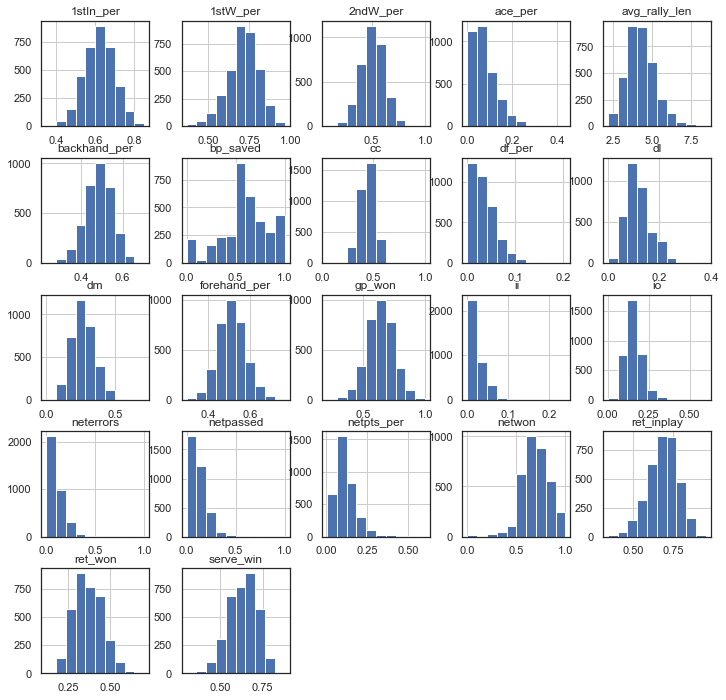

In [441]:
df_features_men.hist(figsize=[12,12]);

In [102]:
df_target_women = df_women_1p['pWin_binary']

In [245]:
df_features_women = df_women_1p.drop(['pWin_binary', 'dominance'], axis=1)

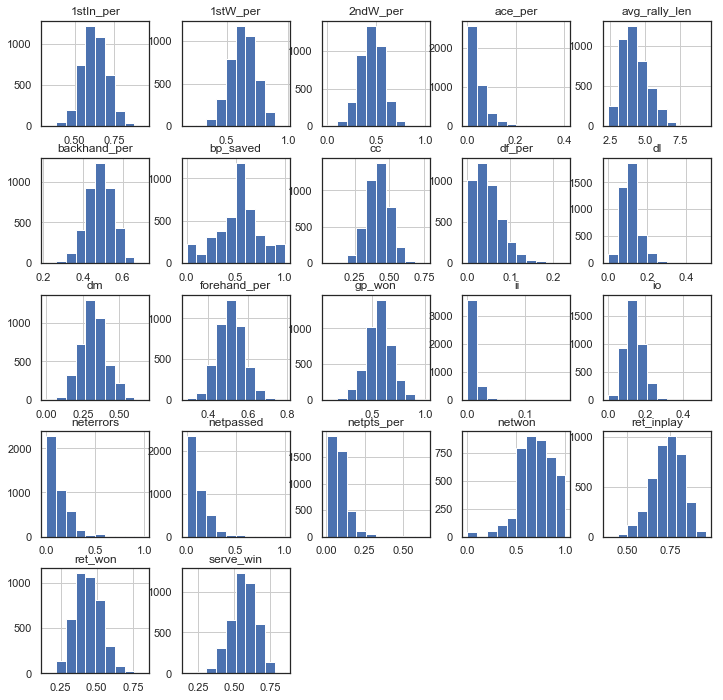

In [246]:
df_features_women.hist(figsize=[12,12]);

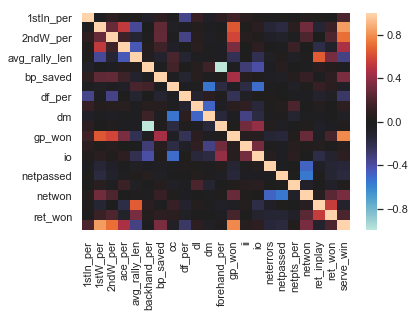

In [247]:
import seaborn as sns
sns.heatmap(df_features_men.corr(), center=0);

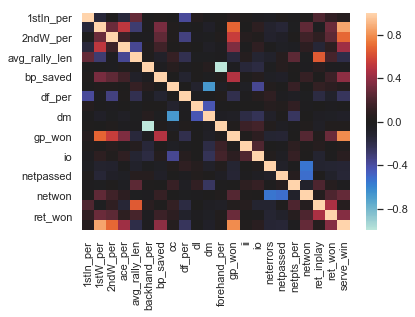

In [248]:
sns.heatmap(df_features_women.corr(), center=0);

# Logistic Regression

### men

In [442]:
import statsmodels.api as sm
logit_model = sm.Logit(df_target_men, df_features_men)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.172189
         Iterations 9


In [443]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            pWin_binary   No. Observations:                 3492
Model:                          Logit   Df Residuals:                     3470
Method:                           MLE   Df Model:                           21
Date:                Wed, 06 Feb 2019   Pseudo R-squ.:                  0.7516
Time:                        17:26:04   Log-Likelihood:                -601.29
converged:                       True   LL-Null:                       -2420.5
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
1stIn_per         1.8794      1.998      0.941      0.347      -2.036       5.795
1stW_per          1.9505      5.280      0.369      0.712      -8.398      12.299
2ndW_per          1.5332      3.113      0.493      0.622      -4.568       7.634
ace_per          -3.2447      1.694     -1.915      0.055      -6.566       0.076
avg_rally_len     0.0958      0.126      0.758      0.448      -0.152       0.343
backhand_per    -47.0335     11.273     -4.172      0.000     -69.129     -24.938
bp_saved          2.8089      0.366      7.684      0.000       2.092       3.525
cc               -1.1198     11.040     -0.101      0.919     -22.757      20.518
df_per           -3.3099      3.666     -0.903      0.367     -10.496       3.876
dl               -4.1364     11.053     -0.374      0.708     -25.800      17.527
dm               -2.2133     10.995     -0.201      0.840     -23.763      19.337
forehand_per    -45.8515     11.231     -4.083      0.000     -67.863     -23.840
gp_won            0.5038      1.252      0.402      0.687      -1.951       2.958
ii                3.6352     11.424      0.318      0.750     -18.755      26.025
io               -3.1112     11.078     -0.281      0.779     -24.824      18.601
neterrors         0.7960      1.207      0.659      0.510      -1.570       3.162
netpassed         1.2729      1.142      1.115      0.265      -0.965       3.510
netpts_per       -0.9400      1.146     -0.820      0.412      -3.186       1.306
netwon            1.2397      0.921      1.346      0.178      -0.566       3.045
ret_inplay       -4.4459      1.307     -3.402      0.001      -7.007      -1.885
ret_won          50.7296      2.331     21.760      0.000      46.160      55.299
serve_win        41.8681      8.538      4.904      0.000      25.133      58.603
=================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [251]:
df_features_mred = df_features_men[['backhand_per','bp_saved','forehand_per','ret_inplay','ret_won','serve_win','dl','netwon','ace_per']]

In [252]:
import statsmodels.api as sm
logit_model = sm.Logit(df_target_men, df_features_mred)
resultr = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.173797
         Iterations 9


In [253]:
resultr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            pWin_binary   No. Observations:                 3492
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                            8
Date:                Wed, 06 Feb 2019   Pseudo R-squ.:                  0.7493
Time:                        16:09:39   Log-Likelihood:                -606.90
converged:                       True   LL-Null:                       -2420.5
                                        LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
backhand_per   -47.8391      2.138    -22.376      0.000     -52.030     -43.649
bp_saved         2.8990      0.343      8.445      0.000       2.226       3.572
forehand_per   -46.5436      2.093    -22.240      0.000     -50.645     -42.442
ret_inplay      -3.2638      1.044     -3.126      0.002      -5.310      -1.218
ret_won         50.1558      2.295     21.854      0.000      45.658      54.654
serve_win       46.3867      2.161     21.466      0.000      42.151      50.622
dl              -1.1320      1.558     -0.727      0.467      -4.185       1.921
netwon           0.5801      0.660      0.879      0.379      -0.713       1.873
ace_per         -4.6096      1.527     -3.018      0.003      -7.603      -1.616
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
mX_train, mX_test, my_train, my_test = train_test_split(df_features_mred, df_target_men, random_state=2)

In [256]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(mX_train, my_train)
model_log

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [257]:
my_hat_test = logreg.predict(mX_test)
my_hat_train = logreg.predict(mX_train)

In [258]:
import numpy as np
#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
m_residuals = np.abs(my_train - my_hat_train)
print(pd.Series(m_residuals).value_counts())
print(pd.Series(m_residuals).value_counts(normalize=True))

0    2431
1     188
Name: pWin_binary, dtype: int64
0    0.928217
1    0.071783
Name: pWin_binary, dtype: float64


In [259]:
m_residuals = np.abs(my_test - my_hat_test)
print(pd.Series(m_residuals).value_counts())
print(pd.Series(m_residuals).value_counts(normalize=True))

0    819
1     54
Name: pWin_binary, dtype: int64
0    0.938144
1    0.061856
Name: pWin_binary, dtype: float64


In [260]:
from sklearn.metrics import confusion_matrix

In [261]:
cm_model_test = confusion_matrix(my_test, my_hat_test)
cm_model_test

array([[439,  27],
       [ 27, 380]])

In [262]:
cm_model_train = confusion_matrix(my_train, my_hat_train)
cm_model_train

array([[1182,   98],
       [  90, 1249]])

In [263]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

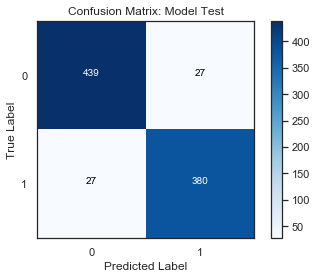

In [264]:
show_cf(my_test, my_hat_test, model_name='Model Test')

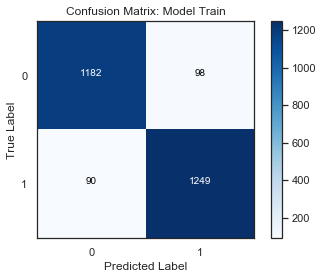

In [265]:
show_cf(my_train, my_hat_train, model_name='Model Train')

In [266]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [267]:
print('Model {} Metrics:'.format('Test Model'))
print('Precision: {}'.format(precision_score(my_test, my_hat_test)))
print('Recall: {}'.format(recall_score(my_test, my_hat_test)))
print('Accuracy: {}'.format(accuracy_score(my_test, my_hat_test)))
print('F1-Score: {}'.format(f1_score(my_test, my_hat_test)))

Model Test Model Metrics:
Precision: 0.9336609336609336
Recall: 0.9336609336609336
Accuracy: 0.9381443298969072
F1-Score: 0.9336609336609336


In [268]:
print('Model {} Metrics:'.format('Train Model'))
print('Precision: {}'.format(precision_score(my_train, my_hat_train)))
print('Recall: {}'.format(recall_score(my_train, my_hat_train)))
print('Accuracy: {}'.format(accuracy_score(my_train, my_hat_train)))
print('F1-Score: {}'.format(f1_score(my_train, my_hat_train)))

Model Train Model Metrics:
Precision: 0.9272457312546399
Recall: 0.9327856609410008
Accuracy: 0.9282168766704849
F1-Score: 0.9300074460163813


In [269]:
from sklearn.metrics import roc_curve, auc

In [270]:
my_score = logreg.fit(mX_train, my_train).decision_function(mX_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [271]:
fpr, tpr, thresholds = roc_curve(my_test, my_score)

AUC: 0.9820733726313126


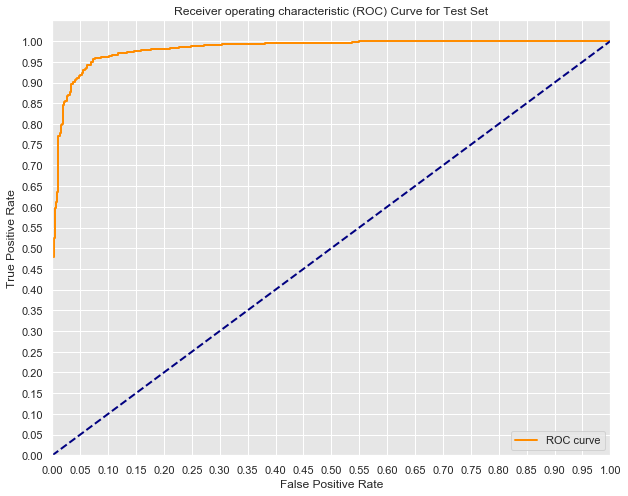

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

### women

In [273]:
import statsmodels.api as sm
logit_model = sm.Logit(df_target_women, df_features_women)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.134820
         Iterations 10


In [274]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            pWin_binary   No. Observations:                 4160
Model:                          Logit   Df Residuals:                     4138
Method:                           MLE   Df Model:                           21
Date:                Wed, 06 Feb 2019   Pseudo R-squ.:                  0.8055
Time:                        16:10:31   Log-Likelihood:                -560.85
converged:                       True   LL-Null:                       -2883.5
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
1stIn_per         1.9609      1.810      1.084      0.279      -1.586       5.508
1stW_per          8.2610      5.099      1.620      0.105      -1.733      18.255
2ndW_per          3.6788      2.936      1.253      0.210      -2.076       9.433
ace_per          -7.7695      2.555     -3.041      0.002     -12.776      -2.763
avg_rally_len     0.0002      0.126      0.002      0.999      -0.246       0.247
backhand_per    -42.8740     11.148     -3.846      0.000     -64.723     -21.025
bp_saved          1.8938      0.488      3.881      0.000       0.937       2.850
cc              -13.0589     10.865     -1.202      0.229     -34.354       8.236
df_per            3.5073      3.105      1.130      0.259      -2.578       9.593
dl              -11.1454     10.806     -1.031      0.302     -32.325      10.034
dm              -11.2019     10.804     -1.037      0.300     -32.378       9.974
forehand_per    -41.4614     11.095     -3.737      0.000     -63.208     -19.715
gp_won            0.0949      1.278      0.074      0.941      -2.410       2.600
ii               -6.2940     12.633     -0.498      0.618     -31.054      18.465
io              -11.8593     10.886     -1.089      0.276     -33.195       9.476
neterrors        -0.0778      1.034     -0.075      0.940      -2.104       1.949
netpassed        -0.6336      1.099     -0.576      0.564      -2.788       1.521
netpts_per        0.6538      1.532      0.427      0.670      -2.348       3.656
netwon            0.0822      0.819      0.100      0.920      -1.523       1.687
ret_inplay       -0.2816      1.397     -0.202      0.840      -3.020       2.456
ret_won          52.0714      2.378     21.893      0.000      47.410      56.733
serve_win        40.0249      8.119      4.930      0.000      24.112      55.938
=================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [275]:
df_features_wred = df_features_women[['ace_per','backhand_per','bp_saved','forehand_per','ret_won','serve_win','1stW_per','cc','1stIn_per']]

In [276]:
import statsmodels.api as sm
logit_model = sm.Logit(df_target_women, df_features_wred)
resultw = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.135448
         Iterations 10


In [277]:
resultw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            pWin_binary   No. Observations:                 4160
Model:                          Logit   Df Residuals:                     4151
Method:                           MLE   Df Model:                            8
Date:                Wed, 06 Feb 2019   Pseudo R-squ.:                  0.8046
Time:                        16:13:23   Log-Likelihood:                -563.46
converged:                       True   LL-Null:                       -2883.5
                                        LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ace_per         -7.8435      2.428     -3.231      0.001     -12.602      -3.085
backhand_per   -52.7373      2.416    -21.832      0.000     -57.472     -48.003
bp_saved         1.9033      0.453      4.197      0.000       1.015       2.792
forehand_per   -51.3679      2.299    -22.341      0.000     -55.874     -46.861
ret_won         52.0220      2.266     22.962      0.000      47.582      56.462
serve_win       48.9244      2.911     16.807      0.000      43.219      54.630
1stW_per         2.8942      1.862      1.555      0.120      -0.755       6.543
cc              -1.7131      1.006     -1.703      0.089      -3.685       0.259
1stIn_per       -0.1464      1.143     -0.128      0.898      -2.387       2.095
================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [278]:
wX_train, wX_test, wy_train, wy_test = train_test_split(df_features_wred, df_target_women, random_state=2)

In [279]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(wX_train, wy_train)
model_log

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [280]:
wy_hat_test = logreg.predict(wX_test)
wy_hat_train = logreg.predict(wX_train)

In [281]:
w_residuals = np.abs(wy_train - wy_hat_train)
print(pd.Series(w_residuals).value_counts())
print(pd.Series(w_residuals).value_counts(normalize=True))

0    2986
1     134
Name: pWin_binary, dtype: int64
0    0.957051
1    0.042949
Name: pWin_binary, dtype: float64


In [282]:
w_residuals = np.abs(wy_test - wy_hat_test)
print(pd.Series(w_residuals).value_counts())
print(pd.Series(w_residuals).value_counts(normalize=True))

0    999
1     41
Name: pWin_binary, dtype: int64
0    0.960577
1    0.039423
Name: pWin_binary, dtype: float64


In [283]:
cm_model_test = confusion_matrix(wy_test, wy_hat_test)
cm_model_test

array([[483,  15],
       [ 26, 516]])

In [284]:
cm_model_train = confusion_matrix(wy_train, wy_hat_train)
cm_model_train

array([[1517,   65],
       [  69, 1469]])

In [285]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

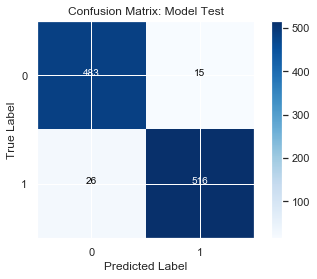

In [286]:
show_cf(wy_test, wy_hat_test, model_name='Model Test')

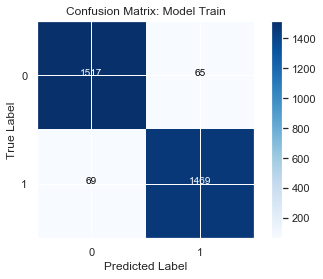

In [287]:
show_cf(wy_train, wy_hat_train, model_name='Model Train')

In [288]:
print('Model {} Metrics:'.format('Test Model'))
print('Precision: {}'.format(precision_score(wy_test, wy_hat_test)))
print('Recall: {}'.format(recall_score(wy_test, wy_hat_test)))
print('Accuracy: {}'.format(accuracy_score(wy_test, wy_hat_test)))
print('F1-Score: {}'.format(f1_score(wy_test, wy_hat_test)))

Model Test Model Metrics:
Precision: 0.9717514124293786
Recall: 0.9520295202952029
Accuracy: 0.9605769230769231
F1-Score: 0.961789375582479


In [289]:
print('Model {} Metrics:'.format('Train Model'))
print('Precision: {}'.format(precision_score(wy_train, wy_hat_train)))
print('Recall: {}'.format(recall_score(wy_train, wy_hat_train)))
print('Accuracy: {}'.format(accuracy_score(wy_train, wy_hat_train)))
print('F1-Score: {}'.format(f1_score(wy_train, wy_hat_train)))

Model Train Model Metrics:
Precision: 0.9576271186440678
Recall: 0.9551365409622887
Accuracy: 0.9570512820512821
F1-Score: 0.9563802083333334


# Random Forests

In [290]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [291]:
mtree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state=3) 
mtree_clf.fit(mX_train, my_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [292]:
mtree_clf.feature_importances_

array([0.00307248, 0.0186709 , 0.00444305, 0.00318266, 0.41397582,
       0.5488083 , 0.        , 0.00061055, 0.00723624])

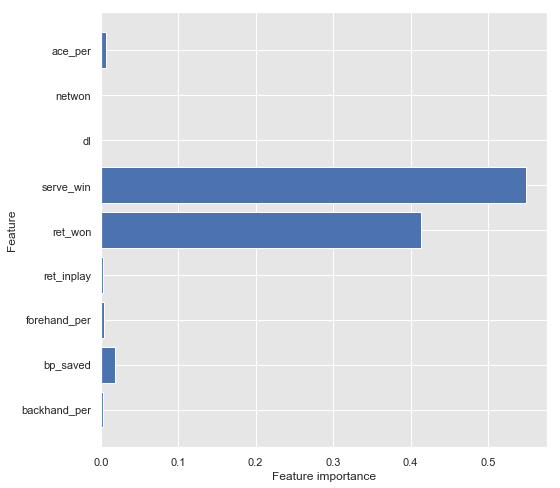

In [293]:
def plot_feature_importances(model):
    n_features = mX_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), mX_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(mtree_clf)


In [294]:
pred = mtree_clf.predict(mX_test)
print(confusion_matrix(my_test, pred))
print(classification_report(my_test, pred))

[[430  36]
 [ 36 371]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       466
           1       0.91      0.91      0.91       407

   micro avg       0.92      0.92      0.92       873
   macro avg       0.92      0.92      0.92       873
weighted avg       0.92      0.92      0.92       873



In [295]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(my_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 91.75%


In [296]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [297]:
bagged_tree.fit(mX_train, my_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [298]:
bagged_tree.score(mX_train, my_train)

0.9385261550210003

In [299]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(mX_train, my_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [300]:
forest.score(mX_train, my_train)

0.9408171057655593

In [301]:
forest.score(mX_test, my_test)

0.9312714776632303

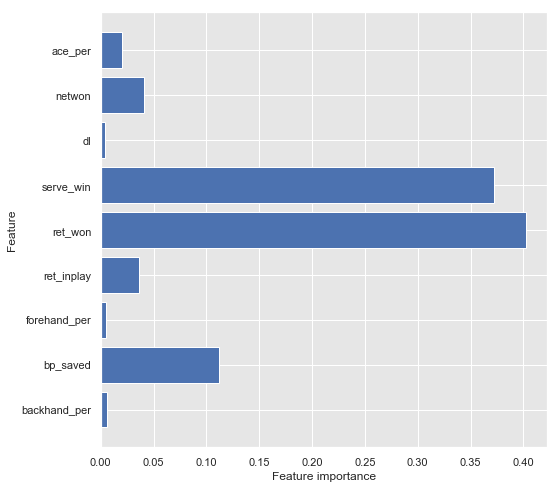

In [302]:
plot_feature_importances(forest)

In [305]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 5, max_depth= 2)
forest_2.fit(mX_train, my_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [306]:
rf_tree_1 = forest_2.estimators_[0]

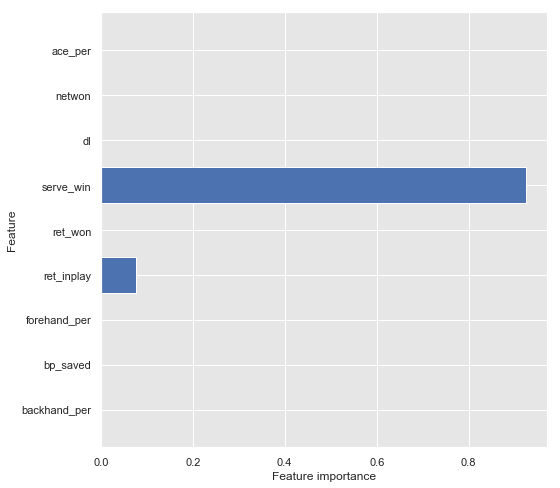

In [307]:
plot_feature_importances(rf_tree_1)

In [308]:
rf_tree_2 = forest_2.estimators_[1]

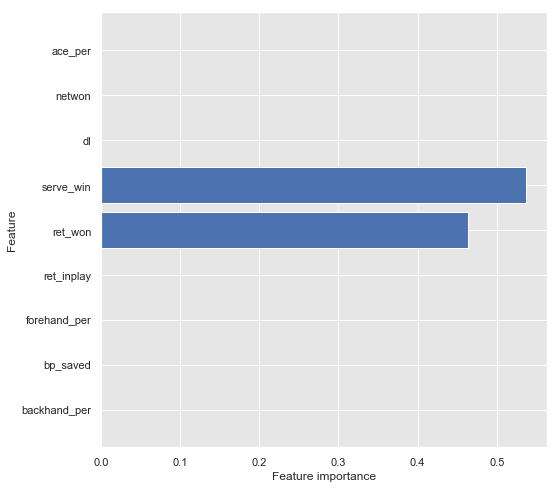

In [309]:
plot_feature_importances(rf_tree_2)

## women

In [310]:
wtree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state=3) 
wtree_clf.fit(wX_train, wy_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [311]:
wtree_clf.feature_importances_

array([0.00145758, 0.        , 0.00763289, 0.00119351, 0.39258689,
       0.59481157, 0.        , 0.00231756, 0.        ])

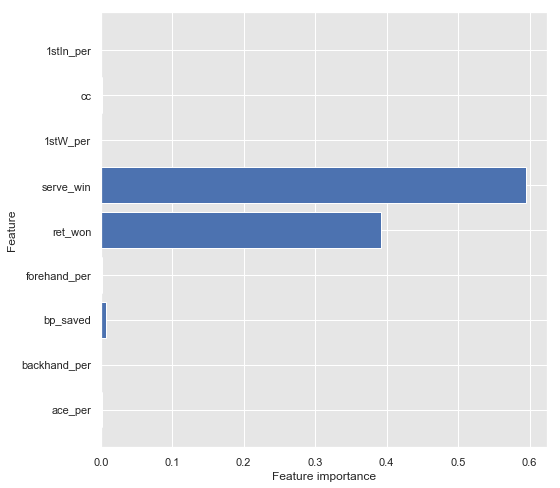

In [312]:
def plot_feature_importances(model):
    n_features = wX_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), wX_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(wtree_clf)

In [313]:
pred = wtree_clf.predict(wX_test)
print(confusion_matrix(wy_test, pred))
print(classification_report(wy_test, pred))

[[476  22]
 [ 36 506]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       498
           1       0.96      0.93      0.95       542

   micro avg       0.94      0.94      0.94      1040
   macro avg       0.94      0.94      0.94      1040
weighted avg       0.94      0.94      0.94      1040



In [314]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(wy_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 94.42%


In [315]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [316]:
bagged_tree.fit(wX_train, wy_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [317]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(wX_train, wy_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [318]:
forest.score(wX_train, wy_train)

0.9586538461538462

In [319]:
forest.score(wX_test, wy_test)

0.9538461538461539

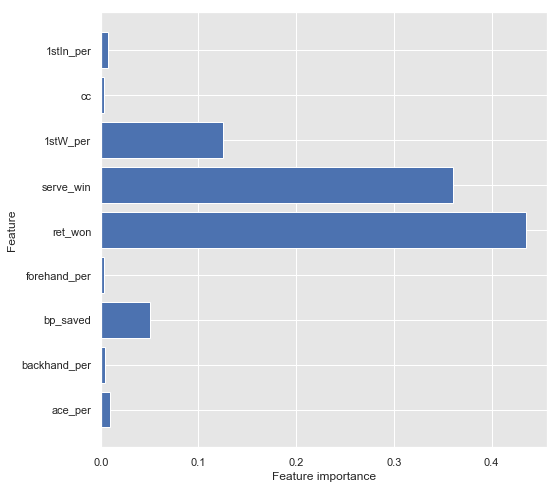

In [320]:
plot_feature_importances(forest)

In [321]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 5, max_depth= 2)
forest_2.fit(wX_train, wy_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [322]:
rf_tree_1 = forest_2.estimators_[0]

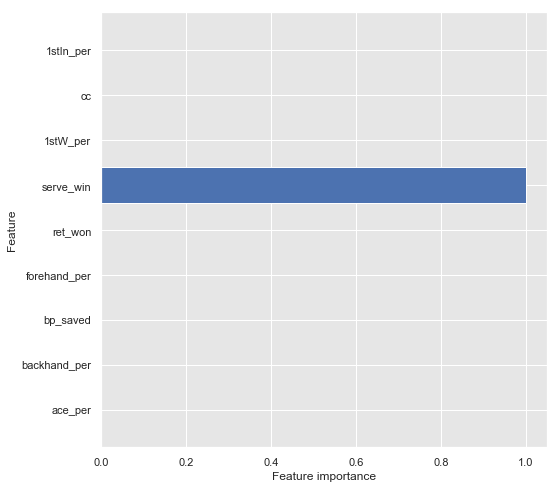

In [323]:
plot_feature_importances(rf_tree_1)

In [324]:
rf_tree_2 = forest_2.estimators_[1]

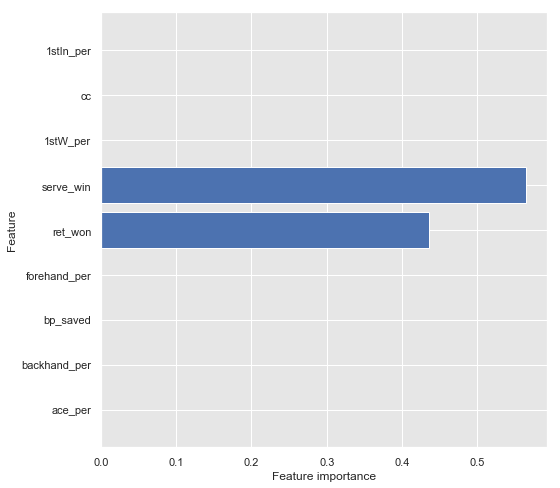

In [325]:
plot_feature_importances(rf_tree_2)

# Decision Trees

In [326]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

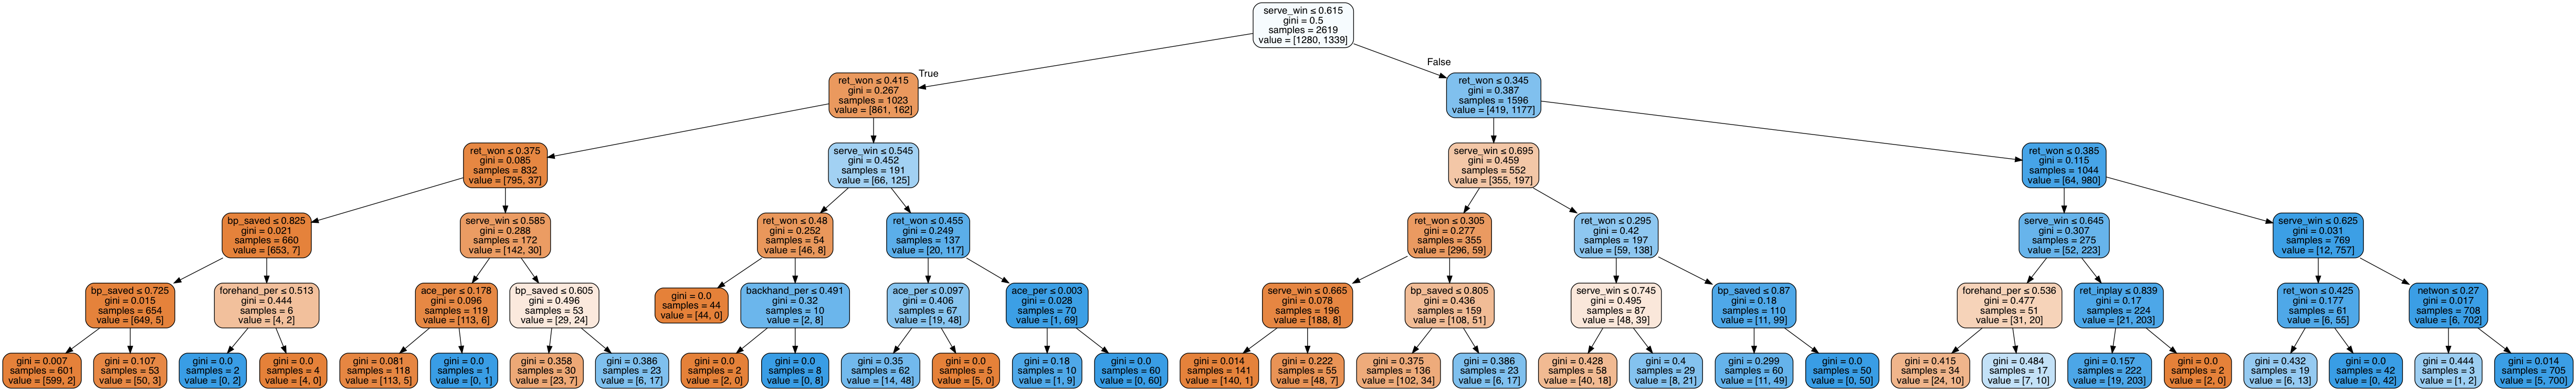

In [327]:
dot_data = StringIO()
export_graphviz(mtree_clf, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names = df_features_mred.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

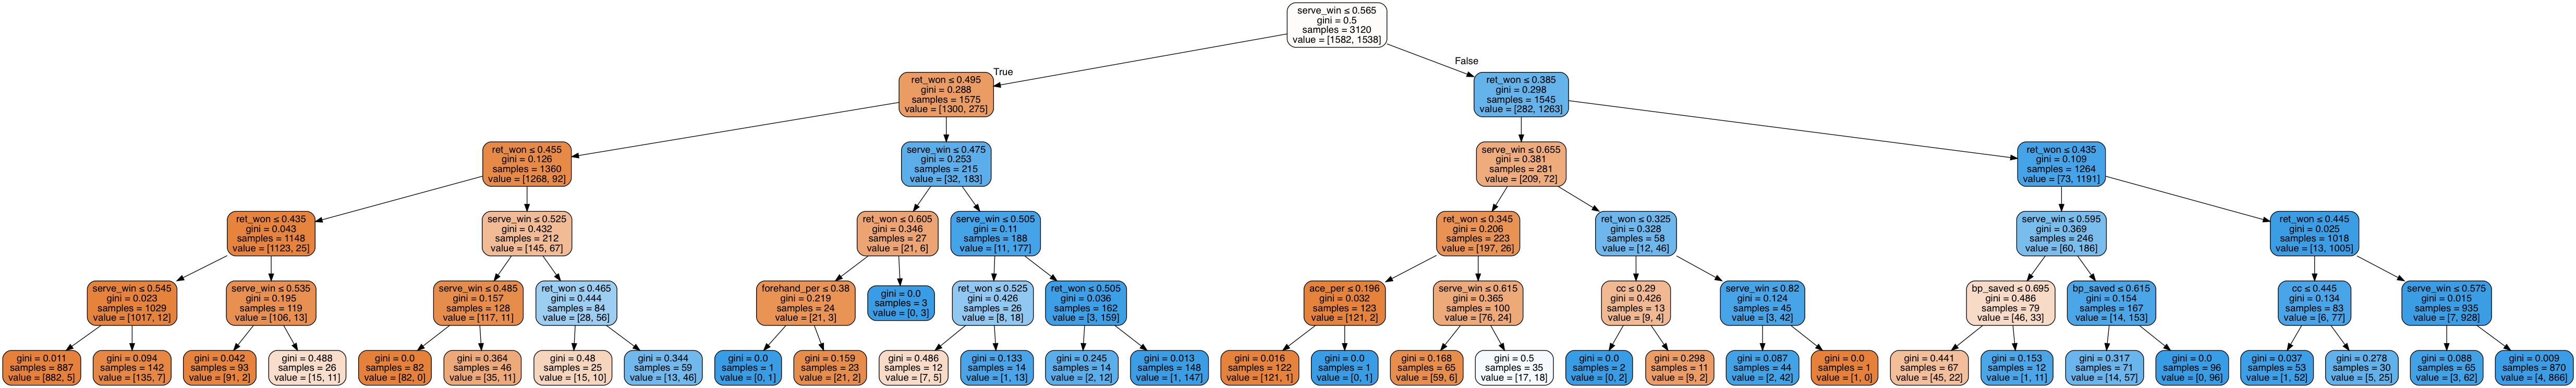

In [328]:
dot_data = StringIO()
export_graphviz(wtree_clf, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names= df_features_wred.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Gradient Boosting

In [329]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [330]:
scaler = StandardScaler()
scaled_mdf = pd.DataFrame(scaler.fit_transform(df_features_mred), columns=df_features_mred.columns)

In [331]:
mgX_train, mgX_test, mgy_train, mgy_test = train_test_split(df_features_men, df_target_men)

In [332]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [333]:
adaboost_clf.fit(mgX_train, mgy_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [334]:
gbt_clf.fit(mgX_train, mgy_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [335]:
adaboost_train_preds = adaboost_clf.predict(mgX_train)
adaboost_test_preds = adaboost_clf.predict(mgX_test)
gbt_clf_train_preds = gbt_clf.predict(mgX_train)
gbt_clf_test_preds = gbt_clf.predict(mgX_test)

In [336]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(mgy_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(mgy_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(mgy_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(mgy_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.9392898052691867
F1-Score: 0.9389166346523242

Model: Gradient Boosted Trees
Accuracy: 0.9595265368461244
F1-Score: 0.9593869731800767

Testing Metrics
Model: AdaBoost
Accuracy: 0.9060710194730813
F1-Score: 0.90744920993228

Model: Gradient Boosted Trees
Accuracy: 0.9186712485681557
F1-Score: 0.9195922989807475


In [337]:
adaboost_confusion_matrix = confusion_matrix(mgy_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[389,  40],
       [ 42, 402]])

In [338]:
gbt_confusion_matrix = confusion_matrix(mgy_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[396,  33],
       [ 38, 406]])

In [339]:
adaboost_classification_report = classification_report(mgy_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       429
           1       0.91      0.91      0.91       444

   micro avg       0.91      0.91      0.91       873
   macro avg       0.91      0.91      0.91       873
weighted avg       0.91      0.91      0.91       873



In [340]:
gbt_classification_report = classification_report(mgy_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       429
           1       0.92      0.91      0.92       444

   micro avg       0.92      0.92      0.92       873
   macro avg       0.92      0.92      0.92       873
weighted avg       0.92      0.92      0.92       873



In [341]:
from sklearn.model_selection import train_test_split, cross_val_score

In [342]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, scaled_mdf, df_target_men, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.9155218993041343


In [343]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, scaled_mdf, df_target_men, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.924967662709783


## women

In [344]:
scaled_wdf = pd.DataFrame(scaler.fit_transform(df_features_wred), columns=df_features_wred.columns)

In [345]:
wgX_train, wgX_test, wgy_train, wgy_test = train_test_split(df_features_women, df_target_women)

In [346]:
adaboost_clf.fit(wgX_train, wgy_train)
gbt_clf.fit(wgX_train, wgy_train)
adaboost_train_preds = adaboost_clf.predict(wgX_train)
adaboost_test_preds = adaboost_clf.predict(wgX_test)
gbt_clf_train_preds = gbt_clf.predict(wgX_train)
gbt_clf_test_preds = gbt_clf.predict(wgX_test)

In [347]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(wgy_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(wgy_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(wgy_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(wgy_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.9471153846153846
F1-Score: 0.9455984174085065

Model: Gradient Boosted Trees
Accuracy: 0.9644230769230769
F1-Score: 0.9634748272458046

Testing Metrics
Model: AdaBoost
Accuracy: 0.9403846153846154
F1-Score: 0.943738656987296

Model: Gradient Boosted Trees
Accuracy: 0.9490384615384615
F1-Score: 0.9519492293744333


In [348]:
adaboost_confusion_matrix = confusion_matrix(wgy_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[458,  25],
       [ 37, 520]])

In [349]:
gbt_confusion_matrix = confusion_matrix(wgy_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[462,  21],
       [ 32, 525]])

In [350]:
adaboost_classification_report = classification_report(wgy_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       483
           1       0.95      0.93      0.94       557

   micro avg       0.94      0.94      0.94      1040
   macro avg       0.94      0.94      0.94      1040
weighted avg       0.94      0.94      0.94      1040



In [351]:
gbt_classification_report = classification_report(wgy_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       483
           1       0.96      0.94      0.95       557

   micro avg       0.95      0.95      0.95      1040
   macro avg       0.95      0.95      0.95      1040
weighted avg       0.95      0.95      0.95      1040



In [352]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, scaled_wdf, df_target_women, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.9408653846153847


In [353]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, scaled_wdf, df_target_women, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.9483173076923078


# Naive Bayes

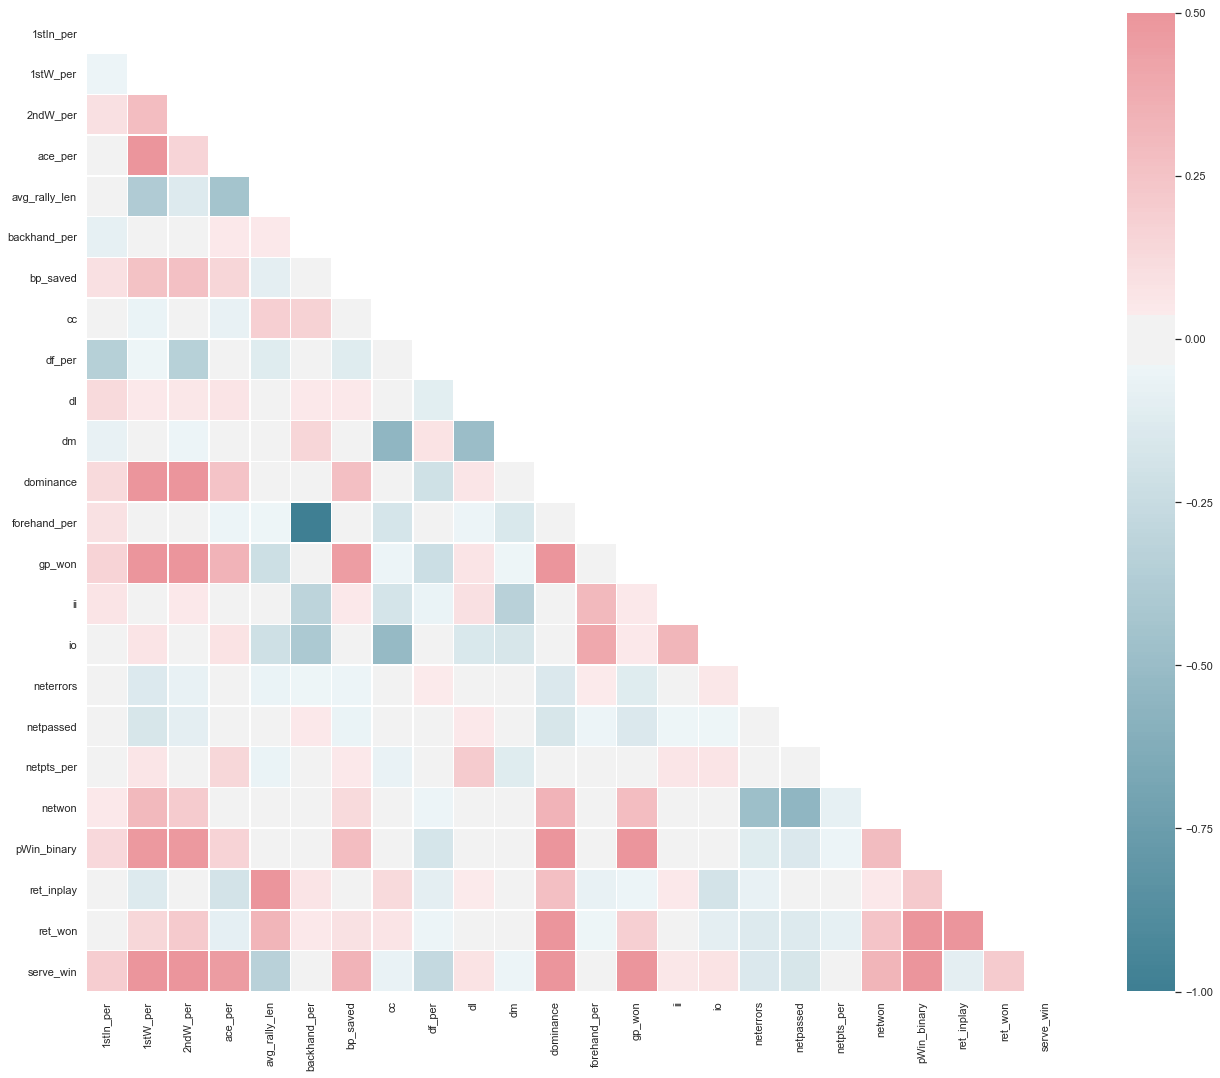

In [354]:
sns.set(style='white')

corr = df_men_1p.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(22,18))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, 
            square=True, linewidths=.5)

In [355]:
from sklearn.naive_bayes import GaussianNB

In [356]:
clf = GaussianNB()
clf.fit(mX_train, my_train)
preds = clf.predict(mX_test)

accuracy = accuracy_score(my_test, preds)


f1 = f1_score(my_test, preds)

print("Accuracy Score for model: {:.4}%".format(accuracy * 100))
print("F1 Score for model: {:.4}%".format(f1 * 100))

Accuracy Score for model: 90.84%
F1 Score for model: 90.31%


In [357]:
training_preds = clf.predict(mX_train)


training_cm = confusion_matrix(training_preds, my_train)


testing_cm = confusion_matrix(preds, my_test)

print("Training Confusion Matrix: {}".format(training_cm))
print("Testing Confusion Matrix: {}".format(testing_cm))

Training Confusion Matrix: [[1160  123]
 [ 120 1216]]
Testing Confusion Matrix: [[420  34]
 [ 46 373]]


In [358]:
df_men_1p.columns

Index(['1stIn_per', '1stW_per', '2ndW_per', 'ace_per', 'avg_rally_len',
       'backhand_per', 'bp_saved', 'cc', 'df_per', 'dl', 'dm', 'dominance',
       'forehand_per', 'gp_won', 'ii', 'io', 'neterrors', 'netpassed',
       'netpts_per', 'netwon', 'pWin_binary', 'ret_inplay', 'ret_won',
       'serve_win'],
      dtype='object')

In [376]:
winner_mu = df_men_gb[['backhand_per','bp_saved','forehand_per','ret_inplay','ret_won','serve_win','dl','netwon','ace_per']][df_men_gb['pWin_binary'] == 1].mean()
winner_var = df_men_gb[['backhand_per','bp_saved','forehand_per','ret_inplay','ret_won','serve_win','dl','netwon','ace_per']][df_men_gb['pWin_binary'] == 1].var()

loser_mu = df_men_gb[['backhand_per','bp_saved','forehand_per','ret_inplay','ret_won','serve_win','dl','netwon','ace_per']][df_men_gb['pWin_binary'] == 0].mean()
loser_var = df_men_gb[['backhand_per','bp_saved','forehand_per','ret_inplay','ret_won','serve_win','dl','netwon','ace_per']][df_men_gb['pWin_binary'] == 0].var()


print('Mean values for winner features\n{}'.format(winner_mu))
print()

print('Variance values for winner features\n{}'.format(winner_var))
print()
print('Mean values for loser features\n{}'.format(loser_mu))

print()
print('Variance values for loser features\n{}'.format(loser_var))

Mean values for winner features
backhand_per    0.484144
bp_saved        0.662245
forehand_per    0.515369
ret_inplay      0.708227
ret_won         0.418494
serve_win       0.683345
dl              0.119427
netwon          0.737423
ace_per         0.085671
dtype: float64

Variance values for winner features
backhand_per    0.004699
bp_saved        0.079433
forehand_per    0.004690
ret_inplay      0.008011
ret_won         0.005249
serve_win       0.003506
dl              0.002298
netwon          0.015631
ace_per         0.003567
dtype: float64

Mean values for loser features
backhand_per    0.486318
bp_saved        0.519737
forehand_per    0.513162
ret_inplay      0.668524
ret_won         0.316735
serve_win       0.581598
dl              0.116621
netwon          0.653729
ace_per         0.066540
dtype: float64

Variance values for loser features
backhand_per    0.003964
bp_saved        0.040056
forehand_per    0.003972
ret_inplay      0.008977
ret_won         0.003506
serve_win       0.

In [377]:
def likelihood(xi, mu, var):
    l = (1 / np.sqrt(2 * np.pi * var)) * np.exp((-(xi - mu) ** 2) / (2 * var))
    return l

In [378]:
class_priors = np.array([0.5, 0.5])
class_priors

array([0.5, 0.5])

In [379]:
df_features_mred.columns

Index(['backhand_per', 'bp_saved', 'forehand_per', 'ret_inplay', 'ret_won',
       'serve_win', 'dl', 'netwon', 'ace_per'],
      dtype='object')

In [456]:
#mean values
# ret_won         0.418494
# backhand_per    0.484144
# forehand_per    0.515369
# serve_win       0.683345
# bp_saved        0.662245
# ret_inplay      0.708227
# netwon          0.737423
# dl              0.119427
# ace_per         0.085671

# ret_won feature
x_1 = likelihood(xi=.37,
                 mu=np.array([winner_mu['ret_won'], loser_mu['ret_won']]),
                 var=np.array([winner_var['ret_won'], loser_var['ret_won']]))

# backhand percentage feature
x_2 = likelihood(xi=.48,
                 mu=np.array([winner_mu['backhand_per'], loser_mu['backhand_per']]),
                 var=np.array([winner_var['backhand_per'], loser_var['backhand_per']]))

# forehand percentage feature
x_3 = likelihood(xi=.50,
                 mu=np.array([winner_mu['forehand_per'], loser_mu['forehand_per']]),
                 var=np.array([winner_var['forehand_per'], loser_var['forehand_per']]))

# serve win feature
x_4 = likelihood(xi=.66,
                 mu=np.array([winner_mu['serve_win'], loser_mu['serve_win']]),
                 var=np.array([winner_var['serve_win'], loser_var['serve_win']]))

# bp saved in feature
x_5 = likelihood(xi=.65,
                 mu=np.array([winner_mu['bp_saved'], loser_mu['bp_saved']]),
                 var=np.array([winner_var['bp_saved'], loser_var['bp_saved']]))

# returns in play feature
x_6 = likelihood(xi=.68,
                 mu=np.array([winner_mu['ret_inplay'], loser_mu['ret_inplay']]),
                 var=np.array([winner_var['ret_inplay'], loser_var['ret_inplay']]))

# net points won feature
x_7 = likelihood(xi=.7,
                 mu=np.array([winner_mu['netwon'], loser_mu['netwon']]),
                 var=np.array([winner_var['netwon'], loser_var['netwon']]))

# down the line feature
x_8 = likelihood(xi=.1,
                 mu=np.array([winner_mu['dl'], loser_mu['dl']]),
                 var=np.array([winner_var['dl'], loser_var['dl']]))

# ace percentage feature
x_9 = likelihood(xi=.07,
                 mu=np.array([winner_mu['ace_per'], loser_mu['ace_per']]),
                 var=np.array([winner_var['ace_per'], loser_var['ace_per']]))

x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9

(array([4.40145485, 4.49556745]),
 array([5.80894641, 6.30455754]),
 array([5.68032659, 6.19342689]),
 array([6.23389439, 3.06617203]),
 array([1.41416769, 1.61282317]),
 array([4.24112274, 4.17985845]),
 array([3.0511702 , 2.59505301]),
 array([7.6657099 , 7.77963419]),
 array([6.45366365, 7.84967246]))

In [457]:
men_prediction = class_priors * x_1 * x_2 * x_3 * x_4 * x_5 * x_6 * x_7 * x_8 * x_9
men_prediction

array([409829.54370632, 287502.70892789])

In [458]:
evidence = np.sum(men_prediction)
posterior = men_prediction / evidence
posterior

array([0.58771058, 0.41228942])

In [459]:
print ('The Naive Bayes predicts Class:', np.argmax(posterior))

The Naive Bayes predicts Class: 0


## women 

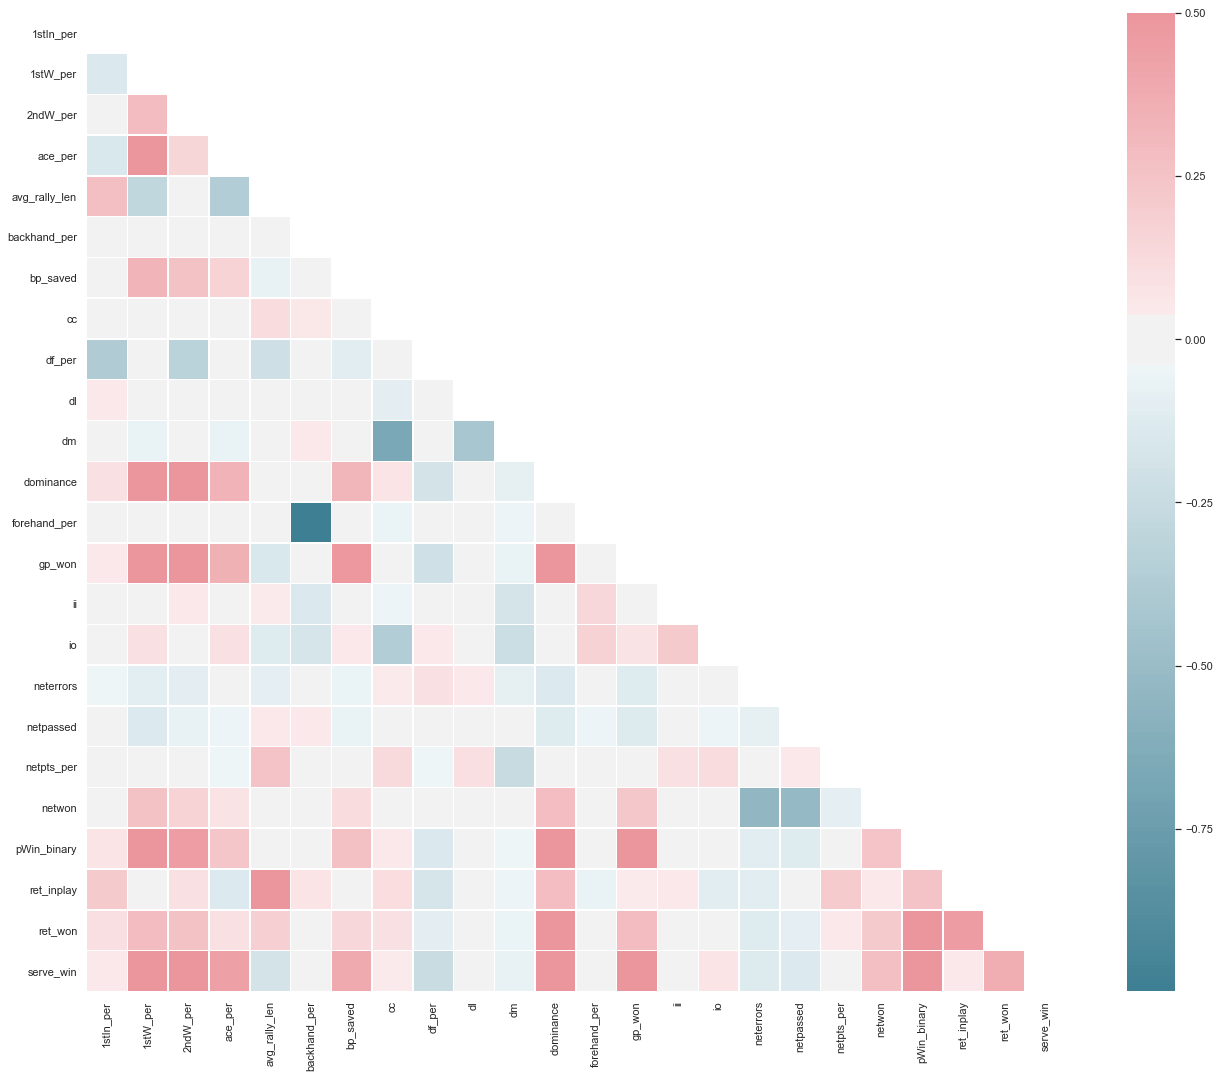

In [373]:
sns.set(style='white')

corr = df_women_1p.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(22,18))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, 
            square=True, linewidths=.5)

In [374]:
clf = GaussianNB()
clf.fit(wX_train, wy_train)
preds = clf.predict(wX_test)

accuracy = accuracy_score(wy_test, preds)


f1 = f1_score(wy_test, preds)

print("Accuracy Score for model: {:.4}%".format(accuracy * 100))
print("F1 Score for model: {:.4}%".format(f1 * 100))

Accuracy Score for model: 91.35%
F1 Score for model: 91.46%


In [375]:
training_preds = clf.predict(wX_train)


training_cm = confusion_matrix(training_preds, wy_train)


testing_cm = confusion_matrix(preds, wy_test)

print("Training Confusion Matrix: {}".format(training_cm))
print("Testing Confusion Matrix: {}".format(testing_cm))

Training Confusion Matrix: [[1442  146]
 [ 140 1392]]
Testing Confusion Matrix: [[468  60]
 [ 30 482]]


In [386]:
w_winner_mu = df_women_gb[['ace_per','backhand_per','bp_saved','forehand_per','ret_won','serve_win','1stW_per','cc','1stIn_per']][df_women_gb['pWin_binary'] == 1].mean()
w_winner_var = df_women_gb[['ace_per','backhand_per','bp_saved','forehand_per','ret_won','serve_win','1stW_per','cc','1stIn_per']][df_women_gb['pWin_binary'] == 1].var()

w_loser_mu = df_women_gb[['ace_per','backhand_per','bp_saved','forehand_per','ret_won','serve_win','1stW_per','cc','1stIn_per']][df_women_gb['pWin_binary'] == 0].mean()
w_loser_var = df_women_gb[['ace_per','backhand_per','bp_saved','forehand_per','ret_won','serve_win','1stW_per','cc','1stIn_per']][df_women_gb['pWin_binary'] == 0].var()


print('Mean values for winner features\n{}'.format(w_winner_mu))
print()

print('Variance values for winner features\n{}'.format(w_winner_var))
print()
print('Mean values for loser features\n{}'.format(w_loser_mu))

print()
print('Variance values for loser features\n{}'.format(w_loser_var))

Mean values for winner features
ace_per         0.049784
backhand_per    0.482578
bp_saved        0.581952
forehand_per    0.516784
ret_won         0.497894
serve_win       0.622014
1stW_per        0.692598
cc              0.423668
1stIn_per       0.632352
dtype: float64

Variance values for winner features
ace_per         0.002225
backhand_per    0.004444
bp_saved        0.067370
forehand_per    0.004434
ret_won         0.005126
serve_win       0.004002
1stW_per        0.007165
cc              0.006487
1stIn_per       0.006575
dtype: float64

Mean values for loser features
ace_per         0.029838
backhand_per    0.485063
bp_saved        0.459096
forehand_per    0.514268
ret_won         0.378159
serve_win       0.502192
1stW_per        0.568982
cc              0.416101
1stIn_per       0.621040
dtype: float64

Variance values for loser features
ace_per         0.000988
backhand_per    0.004512
bp_saved        0.028435
forehand_per    0.004506
ret_won         0.003994
serve_win       0.

In [387]:
df_features_wred.columns

Index(['ace_per', 'backhand_per', 'bp_saved', 'forehand_per', 'ret_won',
       'serve_win', '1stW_per', 'cc', '1stIn_per'],
      dtype='object')

In [504]:
# mean feature values
# 1stIn_per       0.632352
# ret_won         0.497894
# backhand_per    0.482578
# forehand_per    0.516784
# serve_win       0.622014
# 1stW_per        0.692598
# ace_per         0.049784
# bp_saved        0.581952
# cc              0.423668


# 1st serve in percent feature
wx_1 = likelihood(xi=.60,
                 mu =np.array([w_winner_mu['1stIn_per'], w_loser_mu['1stIn_per']]),
                 var =np.array([w_winner_var['1stIn_per'], w_loser_var['1stIn_per']]))

# ret_won feature
wx_2 = likelihood(xi=.45,
                 mu=np.array([w_winner_mu['ret_won'], w_loser_mu['ret_won']]),
                 var=np.array([w_winner_var['ret_won'], w_loser_var['ret_won']]))

# backhand percentage feature
wx_3 = likelihood(xi=.48,
                 mu=np.array([w_winner_mu['backhand_per'], w_loser_mu['backhand_per']]),
                 var=np.array([w_winner_var['backhand_per'], w_loser_var['backhand_per']]))

# forehand percentage feature
wx_4 = likelihood(xi=.515,
                 mu=np.array([w_winner_mu['forehand_per'], w_loser_mu['forehand_per']]),
                 var=np.array([w_winner_var['forehand_per'], w_loser_var['forehand_per']]))

# serve win feature
wx_5 = likelihood(xi=.6,
                 mu=np.array([w_winner_mu['serve_win'], w_loser_mu['serve_win']]),
                 var=np.array([w_winner_var['serve_win'], w_loser_var['serve_win']]))

# 1st serve win feature
wx_6 = likelihood(xi=.55,
                 mu=np.array([w_winner_mu['1stW_per'], w_loser_mu['1stW_per']]),
                 var=np.array([w_winner_var['1stW_per'], w_loser_var['1stW_per']]))

# ace feature
wx_7 = likelihood(xi=.03,
                 mu=np.array([w_winner_mu['ace_per'], w_loser_mu['ace_per']]),
                 var=np.array([w_winner_var['ace_per'], w_loser_var['ace_per']]))

# bp saved feature
wx_8 = likelihood(xi=.55,
                 mu=np.array([w_winner_mu['bp_saved'], w_loser_mu['bp_saved']]),
                 var=np.array([w_winner_var['bp_saved'], w_loser_var['bp_saved']]))

# cross court feature
wx_9 = likelihood(xi=.50,
                 mu=np.array([w_winner_mu['cc'], w_loser_mu['cc']]),
                 var=np.array([w_winner_var['cc'], w_loser_var['cc']]))



wx_1, wx_2, wx_3, wx_4, wx_5, wx_6, wx_7, wx_8, wx_9

(array([4.54362623, 4.74526003]),
 array([4.45500597, 3.30827888]),
 array([5.98003185, 5.92264326]),
 array([5.98885729, 5.94260413]),
 array([5.93584072, 2.19042687]),
 array([1.14035862, 4.20935083]),
 array([ 7.74592257, 12.69312935]),
 array([1.52541033, 2.04586167]),
 array([3.1611719 , 2.88348636]))

In [505]:
women_prediction = class_priors * wx_1 * wx_2 * wx_3 * wx_4 * wx_5 * wx_6 * wx_7 * wx_8 * wx_9
women_prediction

array([ 91643.14645667, 190735.38130774])

In [506]:
w_evidence = np.sum(women_prediction)
w_posterior = women_prediction / w_evidence
w_posterior

array([0.32454007, 0.67545993])

In [507]:
print ('The Naive Bayes predicts Class:', np.argmax(w_posterior))

The Naive Bayes predicts Class: 1
